# ☘️ Machine Learning Techniques and Large Language Models for Property Rental Price Prediction in Ireland
*****

**Name:**
Madina Sagatova

**Student ID:**
2021255

**Student email:**
2021255@student.cct.ie

**Programme Title:**
MSc in Data Analytics
*****

This notebook is a part of a capstone project exploring a variety of forecasting methods to predict **quarterly average rental prices** in Dublin, Ireland from 2008 to 2024. After performing Exploratory Data Analysis (EDA), we observed a seasonal and trending pattern in the rent data. This indicated that the problem is best framed as a time series forecasting task, and therefore we applied a range of time series models to predict future rent values in Dublin.

**The following models were implemented:**
- **SARIMA**: Seasonal Autoregressive Integrated Moving Average (traditional statistical model)
- **Prophet**: Trend + seasonality decomposition model developed by Meta
- **Time-LLM**: GPT-based time series model via NeuralForecast
- **Chronos**: Amazon's state-of-the-art transformer-based forecasting models (`T5-Small`, `T5-Base`, `T5-Large`)
- **Few-shot and zero-shot GPT forecasting** via prompt engineering (GPT-3.5 / GPT-4-turbo)

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Importing Libraries</div>

In [ ]:
# !apt-get install -y build-essential python3-dev
# !pip install --upgrade pip
# !apt-get install -y gcc g++ libopenblas-dev liblapack-dev

In [ ]:
from google.colab import drive
import nbformat

# Mount Google Drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Capstone_Madina_Sagatova_2021255.ipynb"   # change this to your file path

# Load notebook
with open(path) as f:
    nb = nbformat.read(f, as_version=4)

# Remove broken widget metadata
if "widgets" in nb.metadata:
    nb.metadata.pop("widgets")

if "colab" in nb.metadata and "referenced_widgets" in nb.metadata["colab"]:
    nb.metadata["colab"].pop("referenced_widgets")

# Save cleaned notebook
clean_path = path.replace(".ipynb", "Capstone_Madina_Sagatova_2021255_clean.ipynb")
with open(clean_path, "w") as f:
    nbformat.write(nb, f)

print("Notebook cleaned → saved as", clean_path)


Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Capstone_Madina_Sagatova_2021255.ipynb'

In [ ]:
# !pip uninstall -y pmdarima Cython
# !pip install Cython

In [ ]:
# !pip install --no-binary :all: pmdarima

In [ ]:
# !pip install --upgrade numpy
import numpy as np
print("Numpy version:", np.__version__)

# from pmdarima import auto_arima
# print("pmdarima installed successfully!")

Numpy version: 1.24.4


In [ ]:
# DATA ANALYSIS & MANIPULATION
import pandas as pd                      # Pandas for data manipulation and analysis using DataFrames
import numpy as np                       # Numerical computing

# STATIC VISUALISATION
import matplotlib.pyplot as plt          # Matplotlib for plotting
import matplotlib as mpl                 # Extra plotting features
import seaborn as sns                    # Statistical data visualisation

# INTERACTIVE VISUALISATION
import plotly.express as px              # Interactive plotting (e.g., animated and zoomable plots)

# DATA SOURCING
import requests                          # HTTP requests for APIs, downloading data, etc.

# TIME SERIES ANALYSIS (ARIMA)
import statsmodels.api as sm                                   # Statistical models (includes ARIMA)
from statsmodels.tsa.stattools import adfuller                 # Augmented Dickey-Fuller Test
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Autocorrelation plots

# EVALUATION METRICS
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)                                                              # Common regression metrics

# AUTO ARIMA
# !pip install numpy==1.24.4 pmdarima==2.0.3 --force-reinstall --no-cache-dir
from pmdarima import auto_arima         # Automatically finds the best ARIMA model

# TIME SERIES FORECASTING (PROPHET)
from prophet import Prophet             # Facebook Prophet for time series forecasting with trend/seasonality

# OPENAI LLMs
# !pip install openai
# !pip install python-dotenv
import openai                           # OpenAI API for using GPT-style models
import os                               # For managing environment variables and paths
from dotenv import load_dotenv          # Load environment variables from a .env file
import json
from openai import OpenAI

# GENERAL PURPOSE UTILS
import json                             # JSON handling
import ast                              # Abstract Syntax Trees: used to parse Python expressions safely
import re                               # Regular expressions for text pattern matching
from functools import reduce            # Functional programming (reduce for cumulative operations)

In [ ]:
# NEURAL TIME SERIES FORECASTING
!pip install -U -q "git+https://github.com/Nixtla/neuralforecast.git@main#egg=neuralforecast[llm]"
from neuralforecast import NeuralForecast             # Forecasting wrapper for multiple deep learning models
from neuralforecast.models import TimeLLM             # Time-LLM model (uses LLMs for time series)
from pandas.tseries.offsets import QuarterBegin       # To align quarters with calendar year

DEPRECATION: git+https://github.com/Nixtla/neuralforecast.git@main#egg=neuralforecast[llm] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/8

In [ ]:
# PYTORCH SUPPORT
import torch                            # PyTorch backend for deep learning computations

In [ ]:
# AMAZON CHRONOS (LLM-based Time Series Forecasting)
# !pip install numpy --upgrade
# !pip install -U -q "git+https://github.com/amazon-science/chronos-forecasting.git"
from chronos import ChronosPipeline     # Chronos: Amazon's LLM-based time series pipeline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 58.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


/usr/local/lib/python3.11/dist-packages/numpy/_core/_dtype.py:106: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if dtype.type == np.bool:


*****
### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Reading Data using API</div>

In [ ]:
# # Define API endpoint and request payload
# url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22JSON-stat%22,%22version%22:%221.0%22%7D,%22matrix%22:%22RIQ02%22%7D,%22version%22:%222.0%22%7D%7D"

# payload = {
#     "jsonrpc": "2.0",
#     "method": "PxStat.Data.Cube_API.ReadDataset",
#     "params": {
#         "class": "query",
#         "id": [],
#         "dimension": {},
#         "extension": {
#             "pivot": None,
#             "codes": False,
#             "language": {"code": "en"},
#             "format": {"type": "JSON-stat", "version": "1.0"},
#             "matrix": "RIQ02"
#         },
#         "version": "2.0"
#     }
# }

# # Send request to API
# response = requests.post(url, json=payload)
# data = response.json()

# # Extract metadata for mapping
# dimensions = data["result"]["dataset"]["dimension"]

# # Extract values from API
# values_list = data["result"]["dataset"]["value"]

# # Extract labels for each dimension
# quarters_map = dimensions["TLIST(Q1)"]["category"]["label"]
# bedrooms_map = dimensions["C02970V03592"]["category"]["label"]
# property_types_map = dimensions["C02969V03591"]["category"]["label"]
# locations_map = dimensions["C03004V03625"]["category"]["label"]

# # Get ordered lists of keys (ensuring correct index retrieval)
# quarters_keys = list(quarters_map.keys())
# bedrooms_keys = list(bedrooms_map.keys())
# property_types_keys = list(property_types_map.keys())
# locations_keys = list(locations_map.keys())

# # Generate the full dataset structure by iterating over each combination
# data_records = []
# i = 0  # To track index in the `values_list`

# for q in quarters_keys:
#     for b in bedrooms_keys:
#         for p in property_types_keys:
#             for l in locations_keys:
#                 value = values_list[i] if i < len(values_list) else None
#                 data_records.append([
#                     value,
#                     quarters_map[q],
#                     bedrooms_map[b],
#                     property_types_map[p],
#                     locations_map[l]
#                 ])
#                 i += 1  # Increment value index

# # Create DataFrame
# df = pd.DataFrame(data_records, columns=["Average Rent (€)", "Quarter", "Number of Bedrooms", "Property Type", "Location"])

# # Replace None with NaN for better handling
# df.replace({None: np.nan}, inplace=True)

# # Save the dataset
# df.to_csv("rental_price_data.csv", index=False)
# print("Data saved as rental_price_data.csv")


****
### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Loading the CSV File</div>

In [ ]:
# Load data from csv file
# df = pd.read_csv("rental_price_data.csv")

# Load from google drive
from google.colab import drive
drive.mount('/content/drive')

# Adjust the path to where you placed the file
file_path = "/content/drive/MyDrive/rental_price_data.csv"

df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,Average Rent (€),Quarter,Number of Bedrooms,Property Type,Location
0,805.30,2007Q4,All bedrooms,All property types,Carlow
1,NaN,2007Q4,All bedrooms,All property types,Carlow Town
2,NaN,2007Q4,All bedrooms,All property types,"Graiguecullen, Carlow"
3,724.37,2007Q4,All bedrooms,All property types,"Tullow, Carlow"
4,588.23,2007Q4,All bedrooms,All property types,Cavan


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check the shape of DF</div>  

In [ ]:
# Shape of the DF
print(f"Shape of DF: {df.shape}")

Shape of DF: (1273776, 5)


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Print the first 5 rows </div>

In [ ]:
# Explore the top 5 rows
df.head()

,Average Rent (€),Quarter,Number of Bedrooms,Property Type,Location
0,805.30,2007Q4,All bedrooms,All property types,Carlow
1,NaN,2007Q4,All bedrooms,All property types,Carlow Town
2,NaN,2007Q4,All bedrooms,All property types,"Graiguecullen, Carlow"
3,724.37,2007Q4,All bedrooms,All property types,"Tullow, Carlow"
4,588.23,2007Q4,All bedrooms,All property types,Cavan


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check missing values</div>

In [ ]:
df.isnull().sum()

,0
Average Rent (€),917534
Quarter,0
Number of Bedrooms,0
Property Type,0
Location,0


In [ ]:
(df.isnull().sum() / len(df)) * 100

,0
Average Rent (€),72.032602
Quarter,0.000000
Number of Bedrooms,0.000000
Property Type,0.000000
Location,0.000000


In [ ]:
missing_percent_by_bedrooms = df.groupby("Number of Bedrooms")["Average Rent (€)"].apply(lambda x: x.isnull().mean() * 100)
print(missing_percent_by_bedrooms)

Number of Bedrooms
1 to 2 bed       70.953135
1 to 3 bed       57.222698
All bedrooms     52.583421
Four plus bed    86.245933
One bed          87.007056
Three bed        74.643344
Two bed          75.572628
Name: Average Rent (€), dtype: float64


In [ ]:
missing_percent_by_type = df.groupby("Property Type")["Average Rent (€)"].apply(lambda x: x.isnull().mean() * 100)
print(missing_percent_by_type)

Property Type
All property types     37.112334
Apartment              60.500433
Detached house         89.010627
Other flats            92.111957
Semi detached house    74.082413
Terrace house          79.377850
Name: Average Rent (€), dtype: float64


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check Unique Values of "Location" column</div>  

In [ ]:
# Check the unique values of "Location"
df['Location'].unique()

array(['Carlow', 'Carlow Town', 'Graiguecullen, Carlow', 'Tullow, Carlow',
       'Cavan', 'Cavan Town', 'Bailieborough, Cavan',
       'Ballyconnell, Cavan', 'Ballyjamesduff, Cavan', 'Belturbet, Cavan',
       'Cootehill, Cavan', 'Kingscourt, Cavan', 'Virginia, Cavan',
       'Clare', 'Ennis, Clare', 'Killaloe, Clare', 'Kilrush, Clare',
       'Newmarket-On-Fergus, Clare', 'Shannon, Clare',
       'Sixmilebridge, Clare', 'Cork', 'Cork City', 'Ballincollig, Cork',
       'Ballintemple, Cork', 'Ballinure, Cork', 'Bandon, Cork',
       'Bantry, Cork', 'Bishopstown, Cork', 'Blackpool, Cork',
       'Blackrock, Cork', 'Blarney, Cork', 'Carrigaline, Cork',
       'Carrigtwohill, Cork', 'Castlemartyr, Cork', 'Charleville, Cork',
       'Clonakilty, Cork', 'Cloyne, Cork', 'Cobh, Cork',
       'Crosshaven, Cork', 'Douglas, Cork', 'Dunmanway, Cork',
       'Fermoy, Cork', 'Frankfield, Cork', 'Glanmire, Cork',
       'Kanturk, Cork', 'Kinsale, Cork', 'Macroom, Cork', 'Mallow, Cork',
       'Midl

In [ ]:
# Count the unique values of "Location"
df['Location'].nunique()

446

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Filter the data with Main Counties in Ireland</div>  

In [ ]:
# Define a list of main counties
counties = ["Carlow", "Cavan", "Clare", "Cork", "Donegal", "Dublin", "Galway", "Kerry", "Kildare", "Kilkenny", "Laois", "Leitrim",
            "Limerick", "Longford", "Louth", "Mayo", "Meath", "Monaghan", "Offaly", "Roscommon", "Sligo", "Tipperary", "Waterford",
            "Westmeath", "Wexford", "Wicklow"]

# Filter data for only main counties, all bedrooms, and all property types
counties_df = df[df["Location"].isin(counties) &
                 (df["Number of Bedrooms"] == "All bedrooms") &
                 (df["Property Type"] == "All property types")]

In [ ]:
counties_df.head()

,Average Rent (€),Quarter,Number of Bedrooms,Property Type,Location
0,805.30,2007Q4,All bedrooms,All property types,Carlow
4,588.23,2007Q4,All bedrooms,All property types,Cavan
13,715.90,2007Q4,All bedrooms,All property types,Clare
20,945.78,2007Q4,All bedrooms,All property types,Cork
62,581.38,2007Q4,All bedrooms,All property types,Donegal


In [ ]:
counties_df.isnull().sum()

,0
Average Rent (€),0
Quarter,0
Number of Bedrooms,0
Property Type,0
Location,0


In [ ]:
counties_df.shape

(1768, 5)

In [ ]:
# Count non-missing values for each city in the 'Location' column
location_counts = counties_df[counties_df.notna().all(axis=1)]['Location'].value_counts()

# Display the top cities with the most complete records
print(location_counts.head(26))

Location
Carlow       68
Cavan        68
Wexford      68
Westmeath    68
Waterford    68
Tipperary    68
Sligo        68
Roscommon    68
Offaly       68
Monaghan     68
Meath        68
Mayo         68
Louth        68
Longford     68
Limerick     68
Leitrim      68
Laois        68
Kilkenny     68
Kildare      68
Kerry        68
Galway       68
Dublin       68
Donegal      68
Cork         68
Clare        68
Wicklow      68
Name: count, dtype: int64


In [ ]:
counties_df["Quarter"] = pd.PeriodIndex(counties_df["Quarter"], freq='Q').to_timestamp()

<ipython-input-20-f237f8944bbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counties_df["Quarter"] = pd.PeriodIndex(counties_df["Quarter"], freq='Q').to_timestamp()


In [ ]:
counties_df = counties_df.sort_values('Quarter')
# counties_df = counties_df.set_index('Quarter')

<ipython-input-22-ed104e700eb4>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


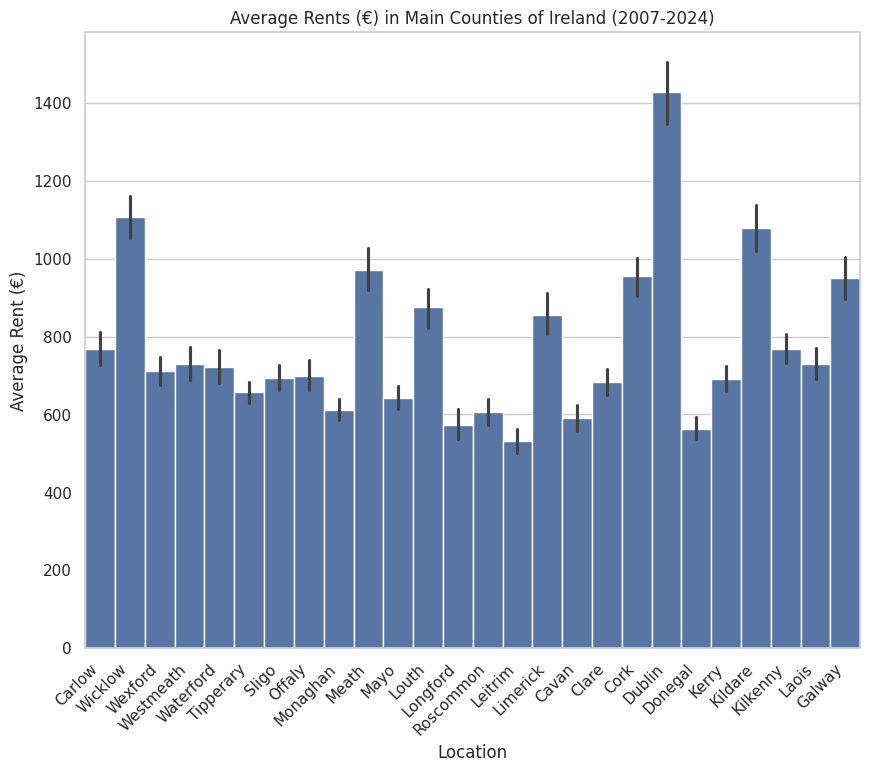

In [ ]:
# Plot bar chart of average rent per county from 2007 to 2024
sns.set(rc = {'figure.figsize':(10, 8)})
sns.set(style="whitegrid")
ax = sns.barplot(x="Location",
                 y="Average Rent (€)",
                 data=counties_df,
                 width = 1)

# Change rotation of x-axis labels
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

# Set the title and y axes label
ax.set(title = 'Average Rents (€) in Main Counties of Ireland (2007-2024)', ylabel = 'Average Rent (€)')

# Format and display
plt.tight_layout

# Displaying the plot
plt.show()

In [ ]:
fig = px.bar(counties_df,
             x='Location',
             y='Average Rent (€)',
             title="Interactive Average Rent by County in Ireland (2007-2024)",
             labels={'Average Rent (€)': 'Average Rent (€)', 'Location':'County'},
             hover_data=["Quarter"],
             color='Average Rent (€)',
             color_continuous_scale="Viridis")

fig.update_layout(xaxis_tickangle=-45, xaxis_title='County', yaxis_title='Average Rent (€)', template="plotly_white")

fig.show()

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check Outliers</div>  
#### Visualizing Outliers with a Boxplot

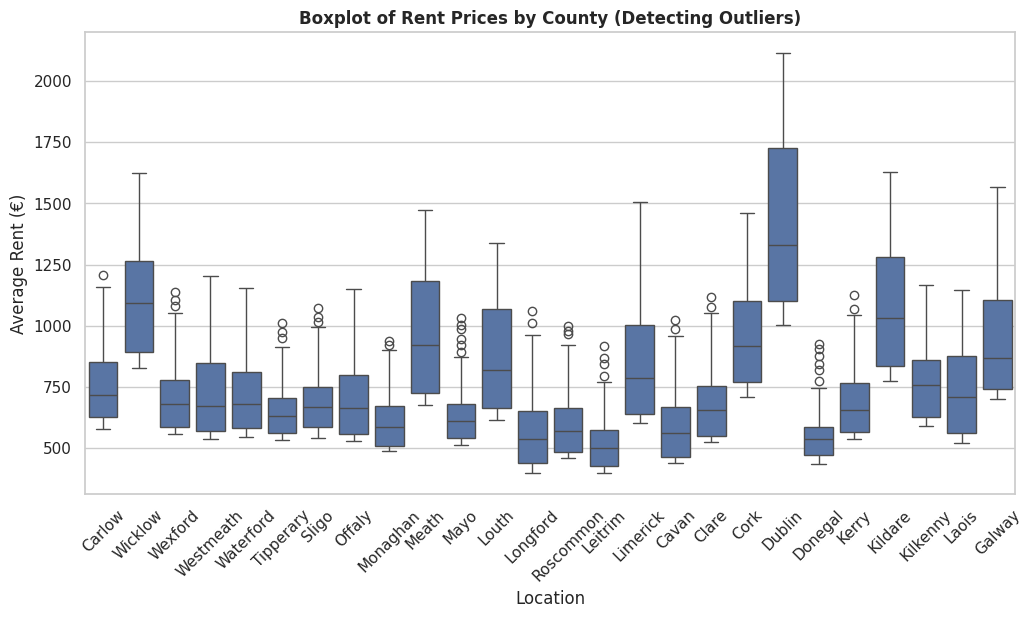

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Average Rent (€)', data=counties_df)
plt.xticks(rotation=45)
plt.title('Boxplot of Rent Prices by County (Detecting Outliers)', fontsize=12, fontweight='bold')
plt.show()

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Filter the data with "Dublin" Location</div>  

In [ ]:
# Filter for only Dublin locations
dublin_df = counties_df[counties_df["Location"] == 'Dublin']

# Reset index after filtering
dublin_df = dublin_df.reset_index(drop=True)

# Set Quarter as Index
dublin_df.set_index("Quarter", inplace=True)

# Keep Only Average Rent
dublin_df = dublin_df[["Average Rent (€)"]]

# Display the first 5 rows
dublin_df.head()

,Average Rent (€)
Quarter,
2007-10-01,1312.69
2008-01-01,1330.38
2008-04-01,1325.04
2008-07-01,1286.54
2008-10-01,1255.72


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check Outliers in Dublin DF Using IQR (Interquartile Range)</div>  

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = dublin_df['Average Rent (€)'].quantile(0.25)
q3 = dublin_df['Average Rent (€)'].quantile(0.75)
iqr = q3 - q1

# Define outlier boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Detect outliers
outliers = dublin_df[(dublin_df["Average Rent (€)"] < lower_bound) |
                       (dublin_df["Average Rent (€)"] > upper_bound)]

# Display the number of outliers
print(f"Number of outliers: {outliers.shape[0]}")

# Show some outliers
outliers.head(20)

Number of outliers: 0


,Average Rent (€)
Quarter,


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



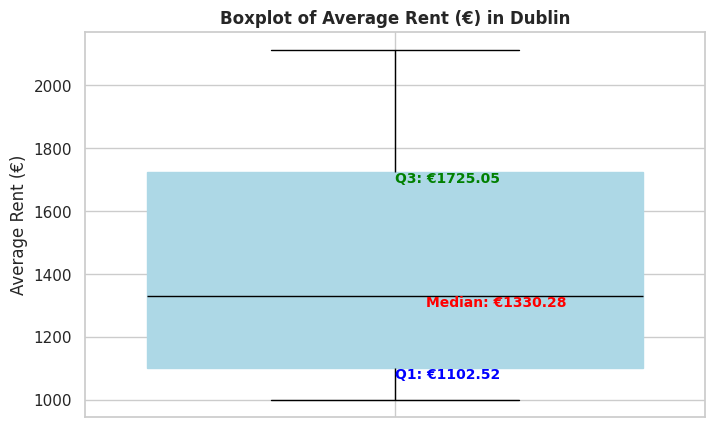

In [ ]:
# Calculate median
median = dublin_df["Average Rent (€)"].median()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    y=dublin_df["Average Rent (€)"],
    boxprops=dict(facecolor='lightblue', color='lightblue'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='black'),
    flierprops=dict(marker='o', color='black', alpha=0.5)
)
plt.title("Boxplot of Average Rent (€) in Dublin", fontsize=12, fontweight='bold')
plt.ylabel("Average Rent (€)")
plt.grid(True)

# Add text for Q1 and Q3
x_pos = 0.2  # horizontal offset for visibility
plt.text(0, q1, f'Q1: €{q1:.2f}', ha='left', va='top', color='blue', rotation=0, fontsize=10, fontweight='bold')
plt.text(0, q3, f'Q3: €{q3:.2f}', ha='left', va='top', color='green', rotation=0, fontsize=10, fontweight='bold')

# Add text for median
plt.text(0.05, median, f'Median: €{median:.2f}', va='top', color='red', rotation=0, fontsize=10, fontweight='bold')

# Save the IMG
# plt.savefig("average_rent_boxplot_dublin.png", dpi=300, bbox_inches='tight')

plt.show()

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check the shape of the Dublin DF</div>

In [ ]:
print(f" Shape of the Dublin DF: {dublin_df.shape}")

 Shape of the Dublin DF: (68, 1)


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Information about the Dataset</div>

In [ ]:
dublin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2007-10-01 to 2024-07-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Average Rent (€)  68 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check if there is any Null value present in the Dataset?</div>

In [ ]:
dublin_df.isnull().sum()

,0
Average Rent (€),0


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check if there is any Duplicate value present in the Dataset?</div>

In [ ]:
print(f'Number of duplicate rows in the dataset: {dublin_df.duplicated().sum()}')

Number of duplicate rows in the dataset: 0


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check Descriptive Statistics</div>

In [ ]:
dublin_df.describe()

,Average Rent (€)
count,68.000000
mean,1428.475147
std,337.306145
min,1001.700000
25%,1102.522500
50%,1330.275000
75%,1725.050000
max,2114.200000


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Quick Visual Overview of Rent Prices Dublin </div>

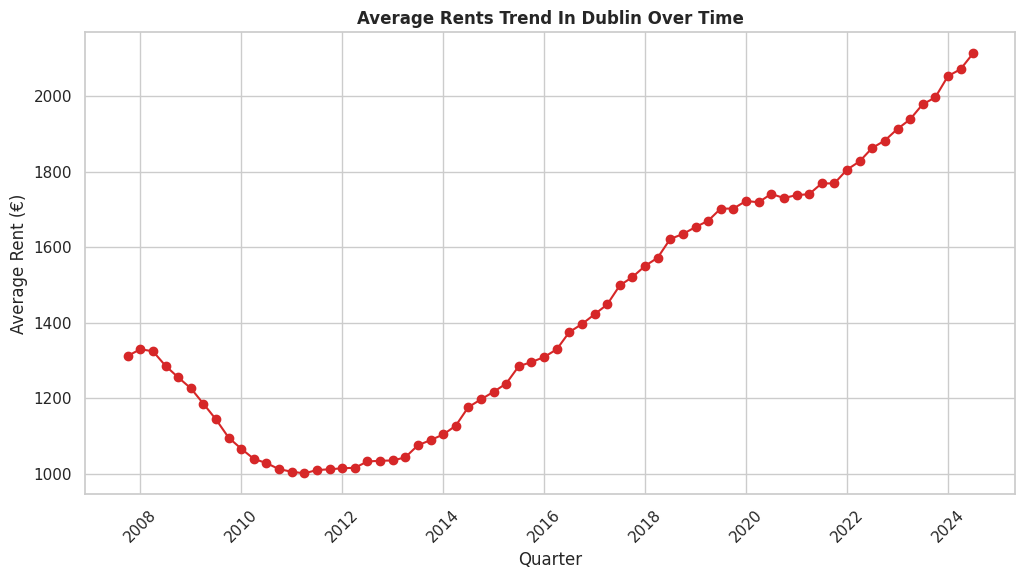

In [ ]:
# Plot the historical trend of average rents in Dublin
plt.figure(figsize=(12, 6))
plt.plot(dublin_df.index, dublin_df['Average Rent (€)'], marker='o', linestyle='-', color='tab:red')
plt.xticks(rotation=90)
plt.title('Average Rents Trend In Dublin Over Time', fontsize=12, fontweight='bold')
plt.xlabel("Quarter")
plt.ylabel("Average Rent (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check Seasonality in Dublin DF</div>

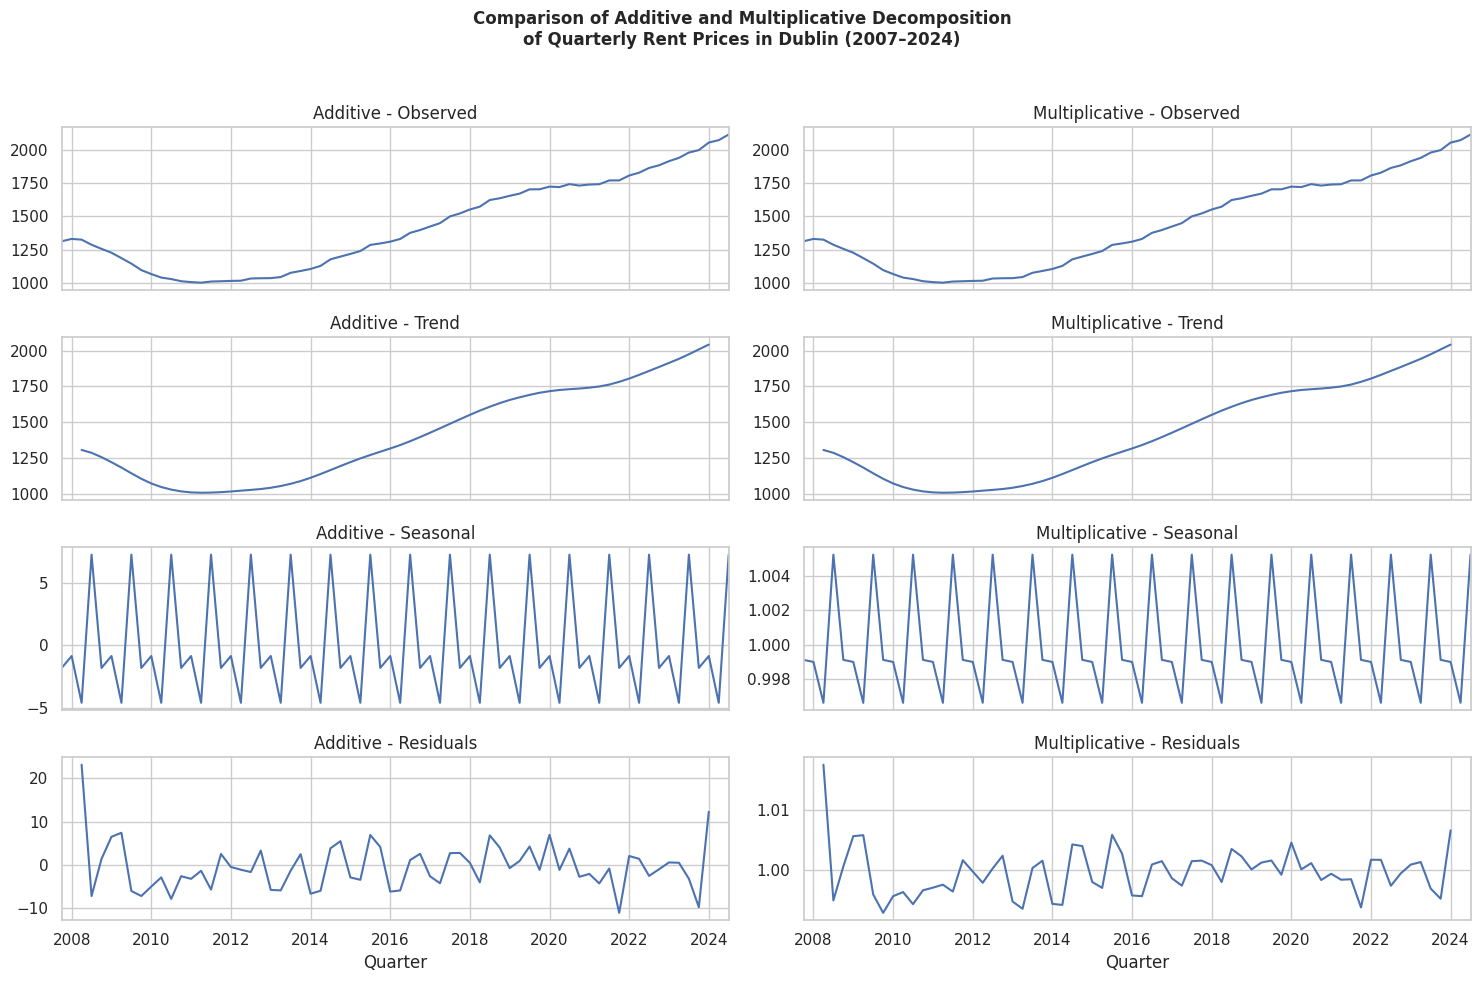

In [ ]:
# Additive
additive_result = sm.tsa.seasonal_decompose(dublin_df["Average Rent (€)"], model='additive', period=4)  # Quarterly data

# Multiplicative
multiplicative_result = sm.tsa.seasonal_decompose(dublin_df["Average Rent (€)"], model='multiplicative', period=4)  # Quarterly data

# Plot decomposition
# fig, ax = plt.subplots(4, 1, figsize=(12, 8))
# decomposition.observed.plot(ax=ax[0], title="Observed")
# decomposition.trend.plot(ax=ax[1], title="Trend")
# decomposition.seasonal.plot(ax=ax[2], title="Seasonality")
# decomposition.resid.plot(ax=ax[3], title="Residuals")
# plt.tight_layout()
# plt.show()

def plot_decomposition(additive, multiplicative):
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(4, 2, figsize=(15, 10), sharex=True)
    fig.suptitle("Comparison of Additive and Multiplicative Decomposition\nof Quarterly Rent Prices in Dublin (2007–2024)", fontsize=12, fontweight='bold')

    # Correct mapping
    attributes = ['observed', 'trend', 'seasonal', 'resid']
    titles = ['Observed', 'Trend', 'Seasonal', 'Residuals']

    for i in range(4):
        getattr(additive, attributes[i]).plot(ax=axes[i, 0], title=f'Additive - {titles[i]}', grid=True)
        getattr(multiplicative, attributes[i]).plot(ax=axes[i, 1], title=f'Multiplicative - {titles[i]}', grid=True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    # Save the IMG
    # plt.savefig("additive_multiplicative_decomposition.png", dpi=300, bbox_inches='tight')
    plt.show()


plot_decomposition(additive_result, multiplicative_result)


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Check Stationarity using ADF Test</div>

In [ ]:
def check_stationarity(series, significance_level=0.05):
    """
    Perform Augmented Dickey-Fuller test to check stationarity of a time series.

    Parameters:
    series(pd.Series) - The time series data
    significance_level(float) - The threshold to determine stationarity (default: 0.05)

    Returns:
    None - Prints the ADF statistic, p-value, and conclution

    """

    result = adfuller(series)

    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])

    if result[1] < significance_level:
        print("✅ The data is stationary (No differencing needed).")
    else:
        print("❌ The data is NOT stationary (Differencing required).")

check_stationarity(dublin_df["Average Rent (€)"])

ADF Statistic: 0.16292482732993036
p-value: 0.9701037953270034
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
❌ The data is NOT stationary (Differencing required).


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Apply First Differencing</div>

In [ ]:
dublin_df["Differenced Rent"] = dublin_df["Average Rent (€)"].diff()

# Drop the first NaN value
dublin_df.dropna(inplace=True)

# Check the ADF test again
check_stationarity(dublin_df["Differenced Rent"])

ADF Statistic: -3.201418577304854
p-value: 0.019902713094491833
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
✅ The data is stationary (No differencing needed).


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Autocorrelation Function (ACF) plot to check for seasonal lags</div>

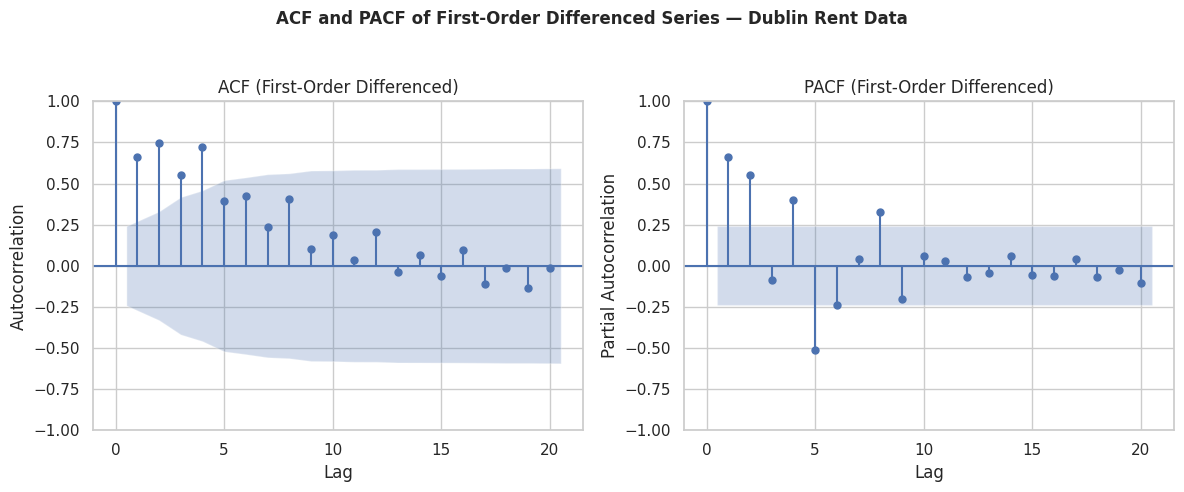

In [ ]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("ACF and PACF of First-Order Differenced Series — Dublin Rent Data", fontsize=12, fontweight='bold') # Add title

# Plot ACF and PACF on differenced series
diff_series = dublin_df["Average Rent (€)"].diff().dropna()
plot_acf(diff_series, ax=axes[0], lags=20)
axes[0].set_title("ACF (First-Order Differenced)", fontsize=12)
axes[0].set_xlabel("Lag")
axes[0].set_ylabel("Autocorrelation")

plot_pacf(diff_series, ax=axes[1], lags=20)
axes[1].set_title("PACF (First-Order Differenced)", fontsize=12)
axes[1].set_xlabel("Lag")
axes[1].set_ylabel("Partial Autocorrelation")

# Layout and show
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the IMG
# plt.savefig("acf_and_pacf.png", dpi=300, bbox_inches='tight')
plt.show()

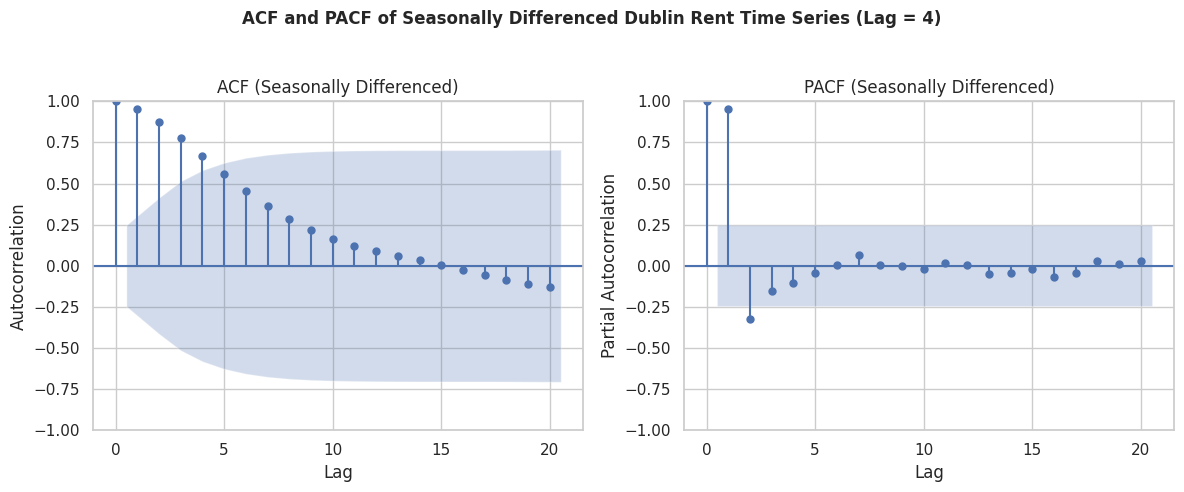

In [ ]:
# Seasonal differencing (remove seasonal cycle)
seasonal_diff = dublin_df['Average Rent (€)'].diff(4).dropna()

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("ACF and PACF of Seasonally Differenced Dublin Rent Time Series (Lag = 4)", fontsize=12, fontweight='bold') # Add title

# Plot ACF and PACF on differenced series
plot_acf(seasonal_diff, ax=axes[0], lags=20)
axes[0].set_title("ACF (Seasonally Differenced)", fontsize=12)
axes[0].set_xlabel("Lag")
axes[0].set_ylabel("Autocorrelation")

plot_pacf(seasonal_diff, ax=axes[1], lags=20)
axes[1].set_title("PACF (Seasonally Differenced)", fontsize=12)
axes[1].set_xlabel("Lag")
axes[1].set_ylabel("Partial Autocorrelation")

# Save the IMG
# plt.savefig("acf_and_pacf_seasonal_diff.png", dpi=300, bbox_inches='tight')

# Layout and show
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">Split the dataset into train and test sets</div>
#### Since the data is time-ordered, we will do a chronological split. The SARIMA model was trained using 70% of the data and evaluated on the remaining 30%. The split ration - 80% train, 20% test is overfitting the model.

In [ ]:
# Define a split ratio (70% train, 30% test)
train_size = int(len(dublin_df) * 0.70)

# Split into train and test
train_df = dublin_df.iloc[:train_size]
test_df = dublin_df.iloc[train_size:]

# Print Shapes
print(f"Train set: {train_df.shape}, Test set: {test_df.shape}")

Train set: (46, 2), Test set: (21, 2)


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">SARIMA MODEL</div>

In [ ]:
def sarima_forecast(train_series, test_series,
                        order=(1,1,1), seasonal_order=(0,1,1,4),
                        title_suffix="", save_plot=False, plot_filename=None):

# Fit the SARIMA model
    sarima_model = sm.tsa.statespace.SARIMAX(
        train_series,
        order=order,
        seasonal_order=seasonal_order,
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)

    # Forecast
    n_forecasts = len(test_series)
    forecast = sarima_model.get_forecast(steps=n_forecasts)
    forecast_values = forecast.predicted_mean

    # Plot the forecast
    plt.figure(figsize=(12, 6))
    plt.plot(train_series.index, train_series, label='Train Data', color='blue')
    plt.plot(test_series.index, test_series, label='Actual Test Data', color='orange')
    plt.plot(test_series.index, forecast_values, label='SARIMA Forecast', color="red", linestyle="dashed")
    plt.legend(loc='upper left')
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Average Rent (€)", fontsize=12)
    plt.title(f"Dublin Rent Price Forecast using SARIMA{order}x{seasonal_order} \n{title_suffix}", fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Save the plot
    if save_plot and plot_filename:
        plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    # Show the plot
    plt.show()

    # Calculate MSE,MAE,MAPE and Accuracy
    mse = mean_squared_error(test_series, forecast_values)
    mae = mean_absolute_error(test_series, forecast_values)
    r2 = r2_score(test_series, forecast_values)
    mape = np.mean(np.abs((test_series - forecast_values) / test_series)) * 100

    # Print the results (MSE, MAE and R²)
    print(f"**SARIMA Model {order}x{seasonal_order} Evaluation**")
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-Squared (R²): {r2:.4f}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

    return sarima_model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



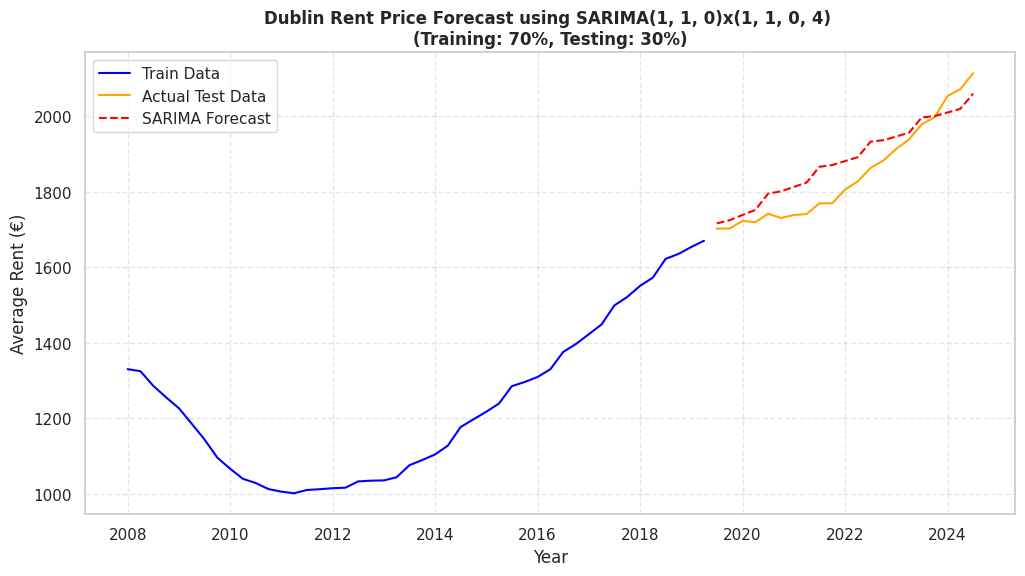

**SARIMA Model (1, 1, 0)x(1, 1, 0, 4) Evaluation**
Mean Squared Error (MSE): 3274.39
Mean Absolute Error (MAE): 49.95
R-Squared (R²): 0.8057
Mean Absolute Percentage Error (MAPE): 2.74%


In [ ]:
sarima_model = sarima_forecast(
    train_df['Average Rent (€)'],
    test_df['Average Rent (€)'],
    order=(1,1,0),
    seasonal_order=(1,1,0,4),
    title_suffix="(Training: 70%, Testing: 30%)",
    save_plot=True,
    plot_filename="sarima_manual_forecast.png"
)

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">AUTO-SARIMA MODEL SELECTION</div>

In [ ]:
best_sarima = auto_arima(train_df["Average Rent (€)"],
                         seasonal=True,
                         m=4,
                         trace=True,
                         suppress_warnings=True,
                         stepwise=True)

print(best_sarima.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=293.057, Time=1.65 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=332.499, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(1,1,0)[4]             : AIC=298.343, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,1,1)[4]             : AIC=312.313, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(0,1,1)[4]             : AIC=291.139, Time=1.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(0,1,0)[4]             : AIC=293.348, Time=0.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(0,1,2)[4]             : AIC=293.048, Time=1.07 sec
 ARIMA(2,1,2)(1,1,0)[4]             : AIC=292.894, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,2)(1,1,2)[4]             : AIC=295.048, Time=1.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,1,1)[4]             : AIC=290.360, Time=1.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,1,0)[4]             : AIC=298.100, Time=0.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(1,1,1)[4]             : AIC=292.349, Time=0.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,1,2)[4]             : AIC=292.339, Time=0.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(1,1,0)[4]             : AIC=297.527, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(1,1,2)[4]             : AIC=294.360, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,2)(0,1,1)[4]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=296.244, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,3)(0,1,1)[4]             : AIC=292.350, Time=0.22 sec
 ARIMA(0,1,3)(0,1,1)[4]             : AIC=293.684, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,1)(0,1,1)[4]             : AIC=298.122, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,1,3)(0,1,1)[4]             : AIC=291.493, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,2)(0,1,1)[4] intercept   : AIC=292.346, Time=0.23 sec

Best model:  ARIMA(1,1,2)(0,1,1)[4]          
Total fit time: 12.909 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   46
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 4)   Log Likelihood                -140.180
Date:                             Wed, 07 May 2025   AIC                            290.360
Time:                                     21:54:01   BIC                            298.928
Sample:                                 01-01-2008   HQIC                           293.480
                                      - 04-01-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



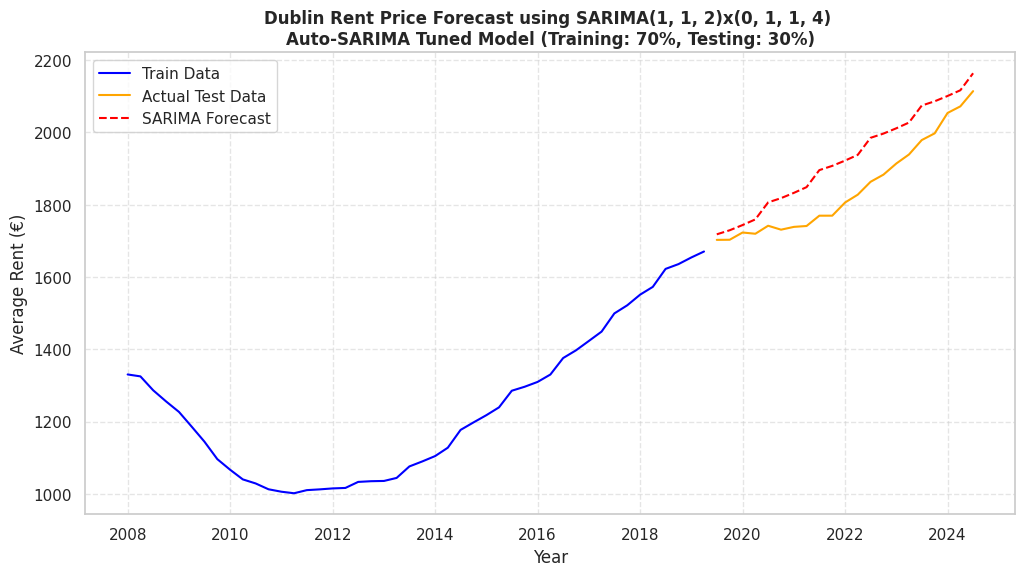

**SARIMA Model (1, 1, 2)x(0, 1, 1, 4) Evaluation**
Mean Squared Error (MSE): 7821.30
Mean Absolute Error (MAE): 80.56
R-Squared (R²): 0.5360
Mean Absolute Percentage Error (MAPE): 4.38%


In [ ]:
auto_sarima_model = sarima_forecast(
    train_df['Average Rent (€)'],
    test_df['Average Rent (€)'],
    order=(1,1,2),
    seasonal_order=(0,1,1,4),
    title_suffix="Auto-SARIMA Tuned Model (Training: 70%, Testing: 30%)",
    save_plot=True,
    plot_filename="sarima_tuned_forecast.png"
)

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">PROPHET MODEL</div>

#### The train/test split used for the Prophet model is 70:30. Prophet requires a sufficient amount of historical data to accurately learn long-term trends and seasonal components. Using smaller training sizes (e.g., 60% or 70%), the model produced unstable forecasts.

In [ ]:
# Reset index if needed
dublin_df = dublin_df.reset_index()
def prophet_forecast(
    df,
    date_col='Quarter',
    target_col='Average Rent (€)',
    train_ratio=0.7,
    add_quarterly_seasonality=False,
    plot=True,
    save_plot=False,
    plot_filename=None,
    title_suffix="",
    **prophet_kwargs  # for tunable parameters like changepoint_prior_scale
):
    """
    Train and evaluate a Prophet model with optional tuning.

    Parameters:
        df (pd.DataFrame): Input time series DataFrame
        date_col (str): Name of the date/time column
        target_col (str): Name of the target column
        train_ratio (float): Ratio for train/test split
        add_quarterly_seasonality (bool): Add quarterly seasonality if True
        plot (bool): Show forecast plot
        save_plot (bool): Save forecast plot to a file
        plot_filename (str): Filename for the forecast plot
        title_suffix (str): Suffix for the plot title
        **prophet_kwargs: Additional keyword arguments passed to Prophet()

    Returns:
        dict: Dictionary of evaluation metrics
    """
    # Ensure datetime format
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])

    # Split on test and train
    train_size = int(len(df) * train_ratio)
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]

    print(f"Train set: {train_df.shape}, Test set: {test_df.shape}")

    # Format the data for Prophet Model
    prophet_train = train_df[[date_col, target_col]].rename(columns={date_col: 'ds', target_col: 'y'})
    prophet_future = test_df[[date_col]].rename(columns={date_col: 'ds'})

    # Initialise Prophet with default and add tuned params
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        **prophet_kwargs  # passed in dynamically
    )

    if add_quarterly_seasonality:
        model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

    model.fit(prophet_train)
    forecast = model.predict(prophet_future)

    # Evaluate
    y_true = test_df[target_col].values
    y_pred = forecast['yhat'].values

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Plot the forecast
    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(train_df[date_col], train_df[target_col], label='Train Data', color='blue')
        plt.plot(test_df[date_col], test_df[target_col], label='Actual Test Data', color='orange')
        plt.plot(test_df[date_col], forecast['yhat'], label='Prophet Forecast', color='red', linestyle='dashed')
        plt.xlabel("Date")
        plt.ylabel(target_col)
        plt.title(f"Dublin Rent Forecast – Prophet {title_suffix} (Train: {train_ratio:.0%})", fontsize=12, fontweight='bold')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend()

        # Save plot
        if save_plot and plot_filename:
          plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
        plt.show()

    # Output the metrics
    print(f"Model Evaluation (Prophet, Train Ratio = {train_ratio}):")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-Squared (R²): {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    return {'mse': mse, 'mae': mae, 'r2': r2, 'mape': mape};


Train set: (46, 3), Test set: (21, 3)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpci9e2cej/c4uo20p1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpci9e2cej/sulcnsy7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30662', 'data', 'file=/tmp/tmpci9e2cej/c4uo20p1.json', 'init=/tmp/tmpci9e2cej/sulcnsy7.json', 'output', 'file=/tmp/tmpci9e2cej/prophet_modelg29xqki6/prophet_model-20250515041224.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:12:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:12:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


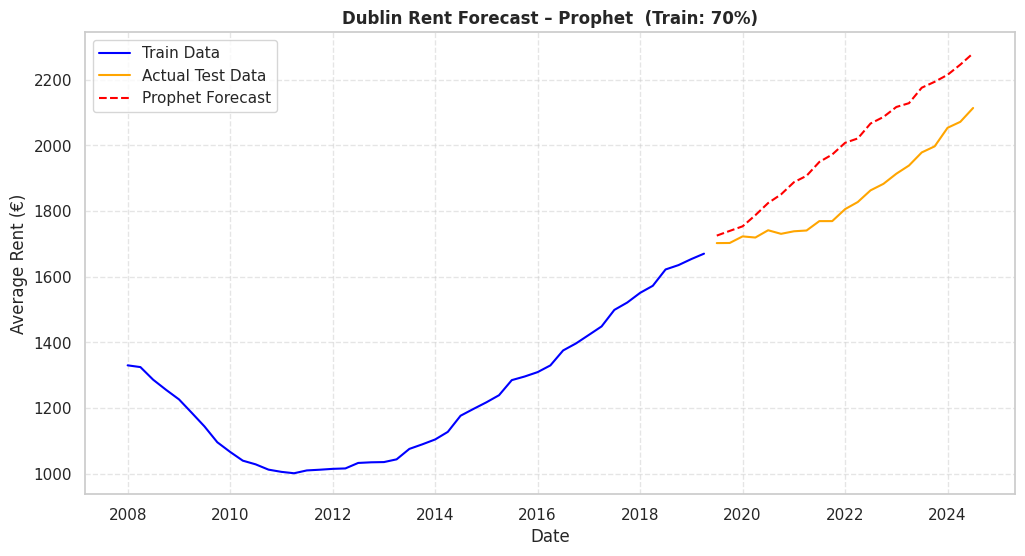

Model Evaluation (Prophet, Train Ratio = 0.7):
Mean Squared Error (MSE): 26324.16
Mean Absolute Error (MAE): 150.12
R-Squared (R²): -0.5617
Mean Absolute Percentage Error (MAPE): 8.03%


In [ ]:
# Train the Prophet model
prophet_model = prophet_forecast(dublin_df, train_ratio=0.7, add_quarterly_seasonality=True, save_plot=True, plot_filename="prophet_default_forecast.png")

In [ ]:
def prophet_grid_search(
    df,
    date_col='Quarter',
    target_col='Average Rent (€)',
    train_ratio=0.7,
    add_quarterly_seasonality=False,
    verbose=True
):
    """
    Perform hyperparameter tuning for Prophet using grid search.

    Parameters:
    - df: DataFrame with a date column and target column
    - date_col: Name of the column containing date values
    - target_col: Name of the target variable
    - train_ratio: Ratio of data used for training (default 0.8)
    - add_quarterly_seasonality: Whether to add custom quarterly seasonality
    - verbose: If True, prints best config and MSE

    Returns:
    - dict with best parameters and MSE
    """

    # Datetime
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])

    # Train and test split
    train_size = int(len(df) * train_ratio)
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]

    # Format for Prophet
    prophet_train = train_df[[date_col, target_col]].rename(columns={date_col: 'ds', target_col: 'y'})
    test_df = test_df.copy()
    test_df.index = pd.to_datetime(test_df.index)

    # Hyperparameter grid
    changepoint_prior_scale = [0.001, 0.01, 0.05, 0.1]
    seasonality_prior_scale = [0.01, 0.1, 1.0, 10.0]
    seasonality_mode = ['additive', 'multiplicative']
    param_grid = list(product(changepoint_prior_scale, seasonality_prior_scale, seasonality_mode))

    best_mse = float('inf')
    best_params = None

    for cps, sps, mode in param_grid:
        model = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False,
            changepoint_prior_scale=cps,
            seasonality_prior_scale=sps,
            seasonality_mode=mode
        )

        if add_quarterly_seasonality:
            model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

        model.fit(prophet_train)

        future = model.make_future_dataframe(periods=len(test_df), freq='Q')
        forecast = model.predict(future)

        # Match forecast length with test set
        y_pred = forecast['yhat'][-len(test_df):].values
        y_true = test_df[target_col].values
        mse = mean_squared_error(y_true, y_pred)

        if mse < best_mse:
            best_mse = mse
            best_params = {
                'changepoint_prior_scale': cps,
                'seasonality_prior_scale': sps,
                'seasonality_mode': mode
            }

    if verbose:
        print(f"Best MSE: {best_mse:.2f} with parameters: {best_params}")

    return {
        'best_mse': best_mse,
        'best_params': best_params
    }

In [ ]:
from itertools import product
# Finf best parameters for Prophet model
# dublin_df = dublin_df.reset_index()  # Make sure "Quarter" is a column
best_prophet_results = prophet_grid_search(
    dublin_df,
    train_ratio=0.7,
    add_quarterly_seasonality=True
)

DEBUG:cmdstanpy:input tempfile: /tmp/tmptqk57vk4/bot2e49g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptqk57vk4/uwrhzax7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61099', 'data', 'file=/tmp/tmptqk57vk4/bot2e49g.json', 'init=/tmp/tmptqk57vk4/uwrhzax7.json', 'output', 'file=/tmp/tmptqk57vk4/prophet_modelpnosu71u/prophet_model-20250504121724.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

DEBUG:cmdstanpy:input tempfile: /tmp/tmptqk57vk4/fbjlzw0f.json
DEBUG:cmd

Best MSE: 6642.84 with parameters: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative'}


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



DEBUG:cmdstanpy:input tempfile: /tmp/tmpci9e2cej/1fd1w4bq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpci9e2cej/m31ok4k8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38002', 'data', 'file=/tmp/tmpci9e2cej/1fd1w4bq.json', 'init=/tmp/tmpci9e2cej/m31ok4k8.json', 'output', 'file=/tmp/tmpci9e2cej/prophet_modelmaqhmm76/prophet_model-20250515041239.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:12:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Train set: (46, 3), Test set: (21, 3)


04:12:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


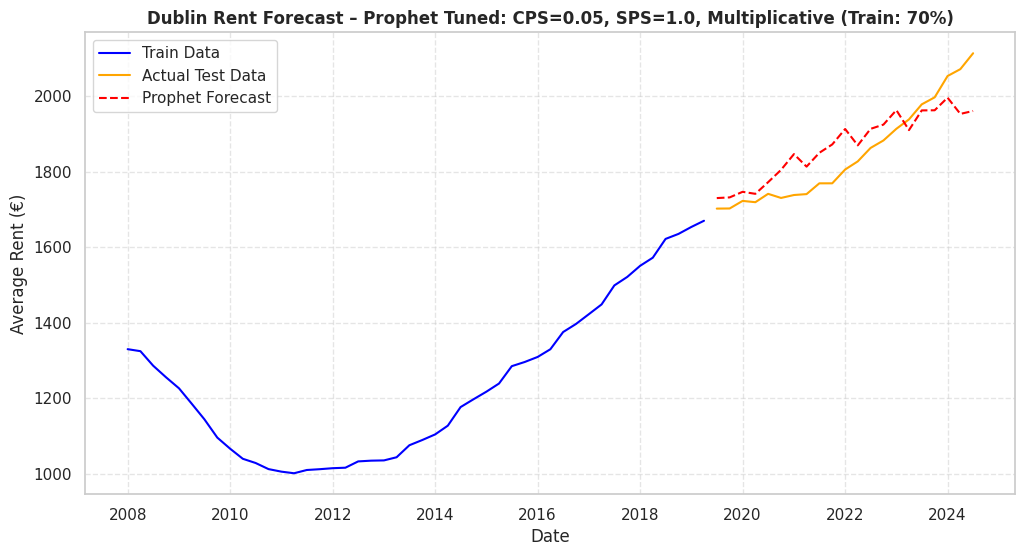

Model Evaluation (Prophet, Train Ratio = 0.7):
Mean Squared Error (MSE): 5066.18
Mean Absolute Error (MAE): 60.61
R-Squared (R²): 0.6995
Mean Absolute Percentage Error (MAPE): 3.26%


In [ ]:
# Train the Prophet model with best parameters from gridsearch
prophet_after_tuning = prophet_forecast(
    dublin_df,
    train_ratio=0.7,
    add_quarterly_seasonality=True,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=1.0,
    seasonality_mode='multiplicative',
    title_suffix="Tuned: CPS=0.05, SPS=1.0, Multiplicative",
    save_plot=True,
    plot_filename="prophet_tuned_forecast.png"
)

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">GPT SHOT MODELS</div>

In [ ]:
# Load the .env file
load_dotenv()

# From Google Drive

dotenv_path = "/content/drive/MyDrive/.env"
load_dotenv(dotenv_path)

True

In [ ]:
# Get the API Key
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
def build_prompt(history_df, n_shot, forecast_horizon=21):
    # Select the last n_shot data points for few-shot context
    shot_df = history_df.tail(n_shot)

    # Determine start date for forecasting based on last known date
    if n_shot > 0:
        last_date = pd.to_datetime(shot_df['Quarter'].max())
    else:
        last_date = pd.to_datetime(history_df['Quarter'].max())  # fallback for zero-shot

    start_date = (last_date + pd.DateOffset(months=3)).strftime('%Y-%m-%d')

    # Create history string for few-shot prompt
    if n_shot > 0:
        # Format the n_shot rows into a string like "Q10-2007: 1312.69"
        history_text = "\n".join(
            f"{row['Quarter']}: {row['Average Rent (€)']:.2f}"
            for _, row in shot_df.iterrows()
        )
        data_part = (
            f"You are a rent prediction model. The data has a clear upward trend and quarterly seasonality.\n"
            f"Here are the last {n_shot} data points:\n{history_text}"
        )
    else:
        data_part = (
            f"You are a rent prediction model. The data has a clear upward trend and quarterly seasonality.\n"
            f"You must forecast the next {forecast_horizon} average rent values for Dublin."
        )

    # Final prompt with dynamic start date
    prompt = f"""
    {data_part}

    Please predict the next {forecast_horizon} average quarterly rents for Dublin.
    Return exactly two Python lists:

    - `Dates`: A list of {forecast_horizon} future quarterly dates starting from '{start_date}', spaced 3 months apart, in YYYY-MM-DD format
    - `Values`: A list of {forecast_horizon} float rent values (do not include € or any placeholders)

    Only return the two lists — no explanation.
    """.strip()

    return prompt


client = OpenAI()
def call_gpt(prompt, model = 'gpt-3.5-turbo'):
    try:
        # Call the GPT model with the constructed prompt
        response = client.chat.completions.create(
            model = model,
            messages = [{'role': 'user', 'content': prompt}],
            temperature = 0,   # == 0 is for deterministic output
        )
        # Extract and return the text content of the first response
        reply = response.choices[0].message.content
        return reply
    except Exception as e:
        # Handle and report API errors
        print('GPT error:', e)
        return None

def parse_gpt_response(reply):
    try:
        # Use regex to extract the list of dates and values from the text
        date_list = re.search(r"Dates\s*[:=]\s*(\[[^\]]+\])", reply)
        value_list = re.search(r"Values\s*[:=]\s*(\[[^\]]+\])", reply)

        # Ensure both lists were found
        if not date_list or not value_list:
            raise ValueError("Could not find both Dates List and Values List")

        # Extract and parse the list strings into Python lists
        dates_str = date_list.group(1)
        values_str = value_list.group(1)

        # Convert the extracted strings to Python list objects safely
        dates = ast.literal_eval(dates_str)
        values = ast.literal_eval(values_str)

        # Validate the lists are the same length
        if len(dates) != len(values):
            raise ValueError("Mismatched number of dates and values.")

        # Return a DataFrame for plotting or evaluation
        return pd.DataFrame({
            "Quarter": pd.to_datetime(dates),
            "Predicted Rent (€)": values
        })

    # Print detailed errors for debugging
    except Exception as e:
        print("Could not parse GPT response:", e)
        print(reply)
        return None

In [ ]:
# Reset index
train_df = train_df.reset_index()

In [ ]:
# Ensure index reset is applied
train_df.head()

,index,Quarter,Average Rent (€),Differenced Rent
0,0,2008-01-01,1330.38,17.69
1,1,2008-04-01,1325.04,-5.34
2,2,2008-07-01,1286.54,-38.50
3,3,2008-10-01,1255.72,-30.82
4,4,2009-01-01,1226.67,-29.05


In [ ]:
# Define the few-shot levels
shot_levels = [0, 1, 5, 10, 20, 30]

# Create a dictionary to store forecast results from each shot level
all_forecasts = {}

# Loop over each few-shot level to generate predictions
for shot in shot_levels:
    print(f'\n Generating {shot}-shot forecast ...')

    # Build the LLM prompt with the specified number of historical examples
    prompt = build_prompt(train_df, n_shot=shot, forecast_horizon=21)

    # Send the prompt to GPT and get a textual response
    response = call_gpt(prompt)

    # Parse the response and convert it into a pandas DF
    forecast_df = parse_gpt_response(response)

    # Only store the DF in a dictionary if the response was successfully parsed
    if forecast_df is not None:
        all_forecasts[f'{shot}-shot'] = forecast_df


 Generating 0-shot forecast ...

 Generating 1-shot forecast ...

 Generating 5-shot forecast ...

 Generating 10-shot forecast ...

 Generating 20-shot forecast ...

 Generating 30-shot forecast ...


In [ ]:
# Check the forecasts
all_forecasts['1-shot'].head(20)

,Quarter,Predicted Rent (€)
0,2019-07-01,1700.0
1,2019-10-01,1730.0
2,2020-01-01,1760.0
3,2020-04-01,1790.0
4,2020-07-01,1820.0
5,2020-10-01,1850.0
6,2021-01-01,1880.0
7,2021-04-01,1910.0
8,2021-07-01,1940.0
9,2021-10-01,1970.0


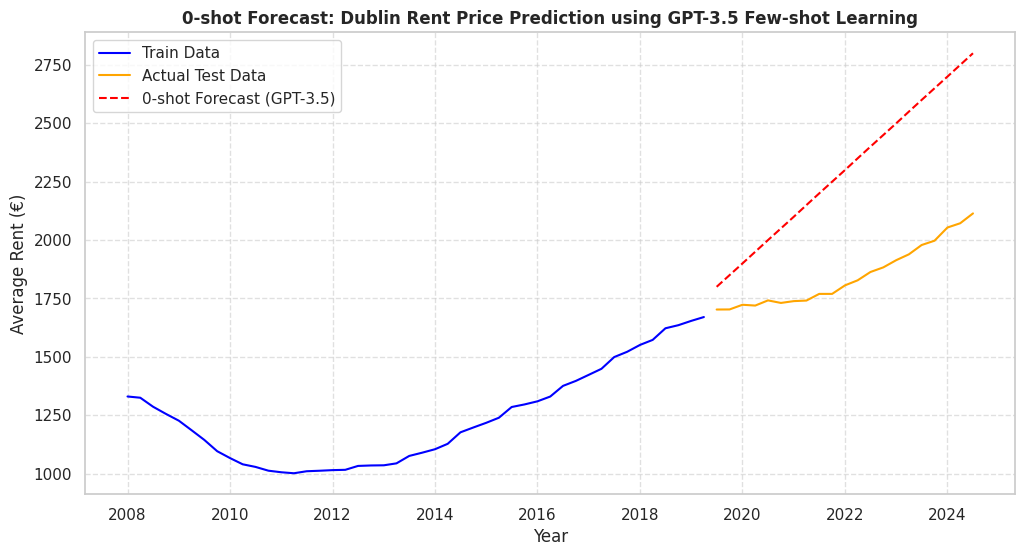

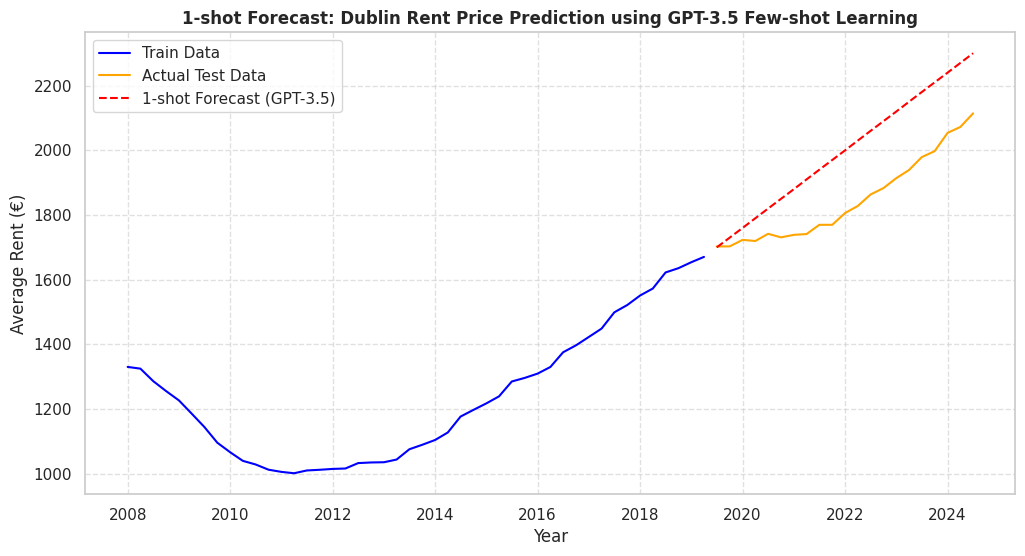

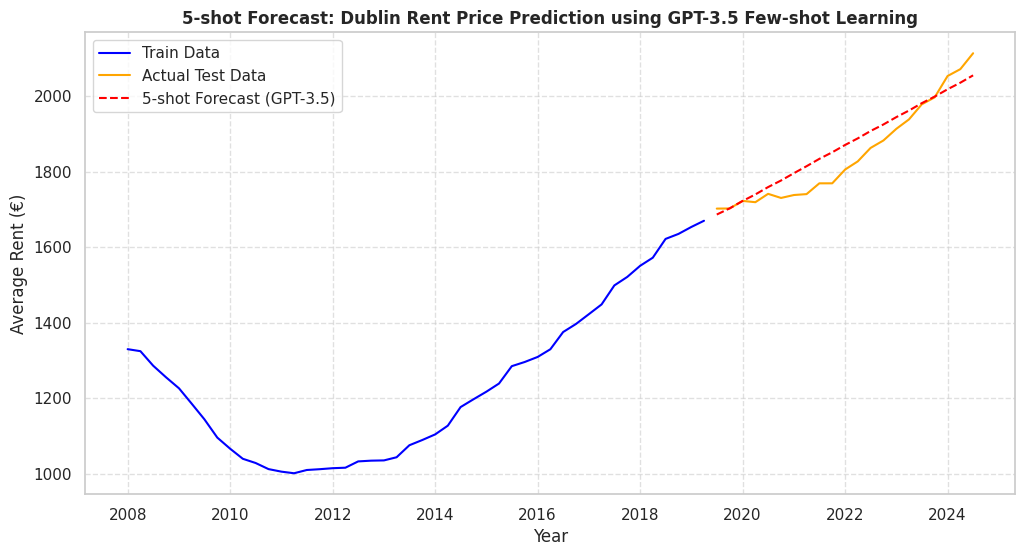

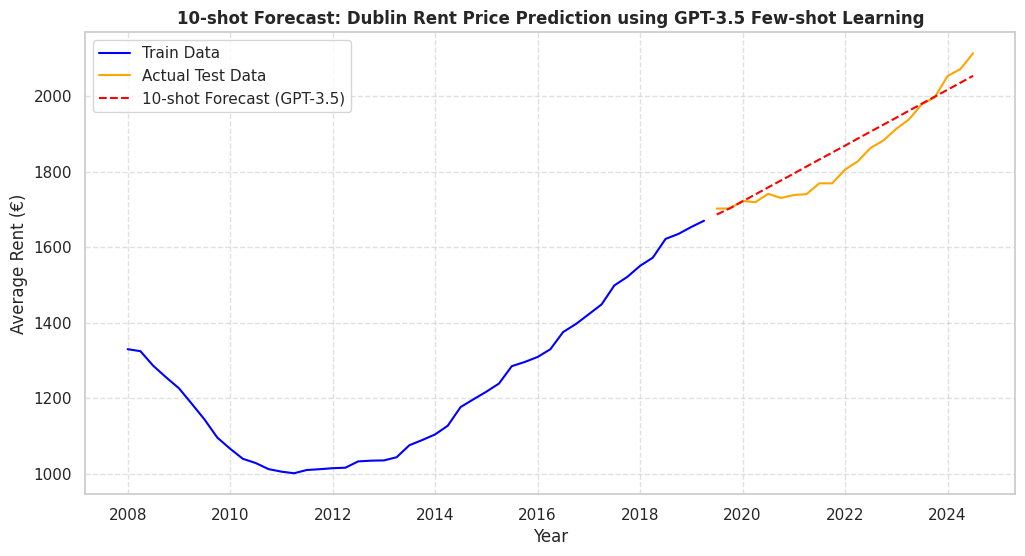

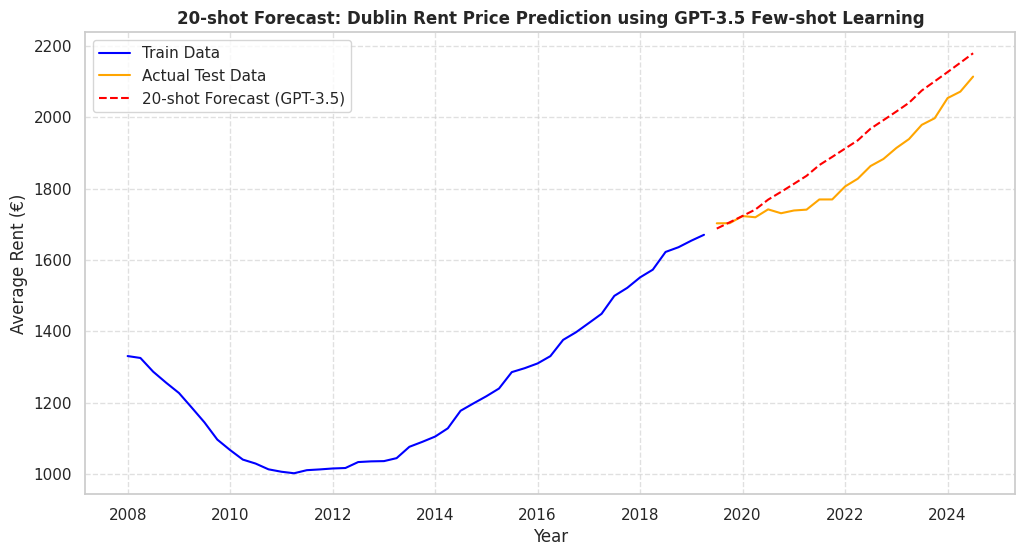

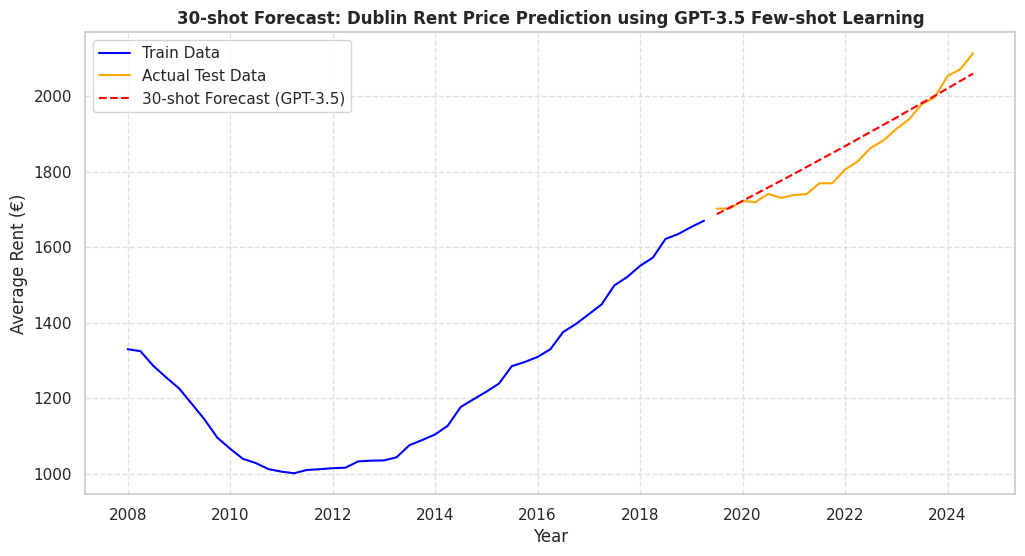

In [ ]:
# Create a directory to save the plots if it doesn't exist
output_dir = "gpt_rent_forecasts"
os.makedirs(output_dir, exist_ok=True)
# Plot GPT-based (gpt-3.5-turbo) rent forecasts for each few-shot level
for shot, forecast_df in all_forecasts.items():
    plt.figure(figsize=(12, 6))

    # Plot the training data (blue line)
    plt.plot(train_df['Quarter'], train_df['Average Rent (€)'], label='Train Data', color='blue')

    # Plot the actual test data (orange line)
    plt.plot(test_df.index, test_df['Average Rent (€)'], label='Actual Test Data', color='orange')

    # Plot the predicted forecast from GPT (red dashed line)
    plt.plot(forecast_df['Quarter'], forecast_df['Predicted Rent (€)'], label=f"{shot} Forecast (GPT-3.5)", color="red", linestyle="dashed")

    # Formatting
    plt.legend(loc='upper left')
    plt.xlabel("Year")
    plt.ylabel("Average Rent (€)")
    plt.title(f"{shot} Forecast: Dublin Rent Price Prediction using GPT-3.5 Few-shot Learning",
              fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Save plot
    filename = f"{shot.lower().replace('-', '_')}_forecast_gpt35.png"
    plt.savefig(os.path.join(output_dir, filename), dpi=300)

    # Show plot
    plt.show()

In [ ]:
# Merge the GPT shot forecasts
def merge_forecast(forecast_dict):

    for shot, df in forecast_dict.items():
        if 'Predicted Rent (€)' in df.columns:
            df.rename(columns={'Predicted Rent (€)': shot}, inplace=True)

    # Outer join
    merged_df = reduce(
        lambda left, right: pd.merge(left, right, on='Quarter', how='outer'),
        forecast_dict.values()
    )

    # Sort by date and reset index
    merged_df = merged_df.sort_values('Quarter').reset_index(drop=True)
    return merged_df

In [ ]:
# Merge the GPT (gpt-3.5-turbo) shot forecasts
merged_gpt_3_5_df = merge_forecast(all_forecasts)

In [ ]:
merged_gpt_3_5_df.head()

,Quarter,0-shot,1-shot,5-shot,10-shot,20-shot,30-shot
0,2019-07-01,1800.0,1700.0,1686.98,1686.98,1687.98,1687.91
1,2019-10-01,1850.0,1730.0,1703.37,1703.44,1705.57,1705.42
2,2020-01-01,1900.0,1760.0,1722.85,1720.02,1723.47,1722.07
3,2020-04-01,1950.0,1790.0,1740.24,1736.61,1741.69,1740.53
4,2020-07-01,2000.0,1820.0,1759.72,1753.31,1760.23,1765.14


In [ ]:
# Evaluate GPT Forecasts for Each Shot Level
# - Merges test data with predictions from GPT (by Quarter)
# - Computes performance metrics: MSE, MAE, and R² for each shot level
def evaluate_llm_forecast(merged_forecast_df, test_df, shot_levels):

    # Reset test_df index to ensure 'Quarter' is a column for merging
    test_df = test_df.reset_index()

    # Merge actual test values with predicted values by 'Quarter'
    shot_evaluation_df = pd.merge(
        test_df[['Quarter', 'Average Rent (€)']],
        merged_forecast_df,
        on='Quarter',
        how='inner')

    # List to collect metric dictionaries for each shot level
    metrics = []

    # Loop through each few-shot level
    for shot in shot_levels:
        if shot in shot_evaluation_df.columns:
            y_true = shot_evaluation_df['Average Rent (€)']
            y_predict = shot_evaluation_df[shot]

            # Calculate error metrics
            mse = mean_squared_error(y_true, y_predict)
            mae = mean_absolute_error(y_true, y_predict)
            r2 =r2_score(y_true, y_predict)
            mape = np.mean(np.abs((y_true - y_predict) / y_true)) * 100

            # Append results
            metrics.append({
            "Shot Level": shot,
            "MSE": round(mse, 2),
            "MAE": round(mae, 2),
            "R²": round(r2, 4),
            "MAPE": round(mape, 2)
            })

    # Return as a DataFrame for display or saving
    return pd.DataFrame(metrics)

In [ ]:
# Define the few-shot levels to evaluate
evaluation_shot_levels = ['0-shot', '1-shot', '5-shot', '10-shot', '20-shot', '30-shot']

# Run the evaluation function to compute MSE, MAE, and R²
gpt_3_5_metrics_df = evaluate_llm_forecast(merged_gpt_3_5_df, test_df, evaluation_shot_levels)

# Display the evaluation results
gpt_3_5_metrics_df.head(6)

,Shot Level,MSE,MAE,R²,MAPE
0,0-shot,238050.59,452.84,-13.1222,24.03
1,1-shot,27894.82,153.10,-0.6548,8.16
2,5-shot,2005.62,37.24,0.8810,2.03
3,10-shot,1962.95,36.81,0.8835,2.01
4,20-shot,6942.54,74.40,0.5881,3.98
5,30-shot,1848.15,35.91,0.8904,1.96


In [ ]:
# Try gpt4 model
shot_levels = [0, 1, 5, 10, 20, 30]
all_forecasts_gpt4 = {}

for shot in shot_levels:
    print(f'\n Generating {shot}-shot forecast with GPT-4-turbo...')
    prompt = build_prompt(train_df, n_shot=shot, forecast_horizon=21)
    response = call_gpt(prompt, model='gpt-4-turbo')
    forecast_gpt4_df = parse_gpt_response(response)

    if forecast_gpt4_df is not None:
        all_forecasts_gpt4[f'{shot}-shot'] = forecast_gpt4_df


 Generating 0-shot forecast with GPT-4-turbo...

 Generating 1-shot forecast with GPT-4-turbo...

 Generating 5-shot forecast with GPT-4-turbo...

 Generating 10-shot forecast with GPT-4-turbo...

 Generating 20-shot forecast with GPT-4-turbo...

 Generating 30-shot forecast with GPT-4-turbo...


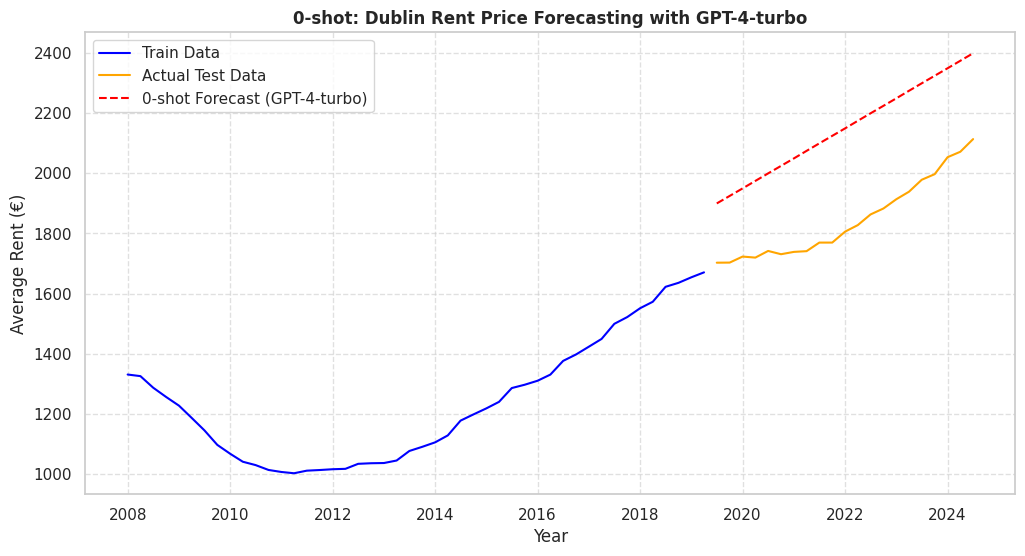

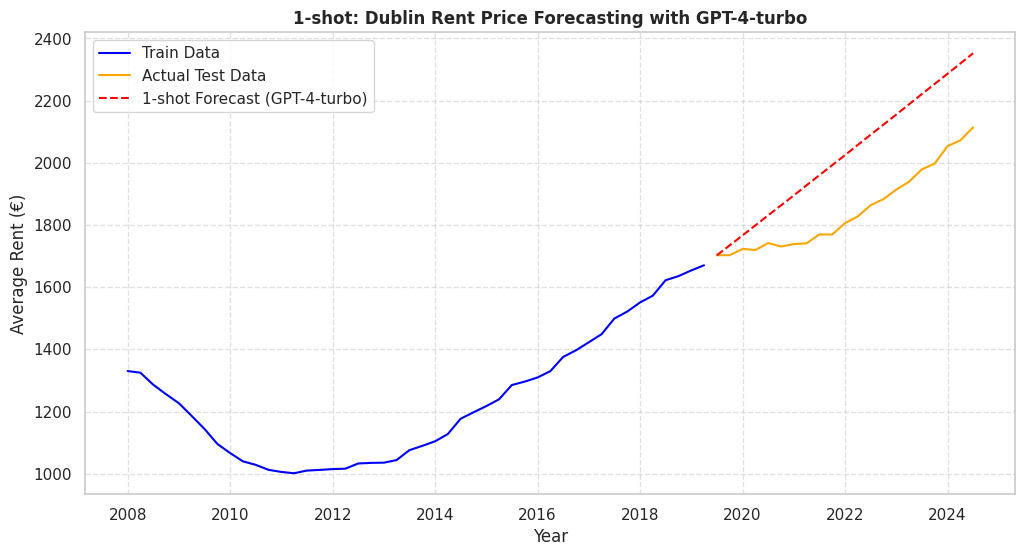

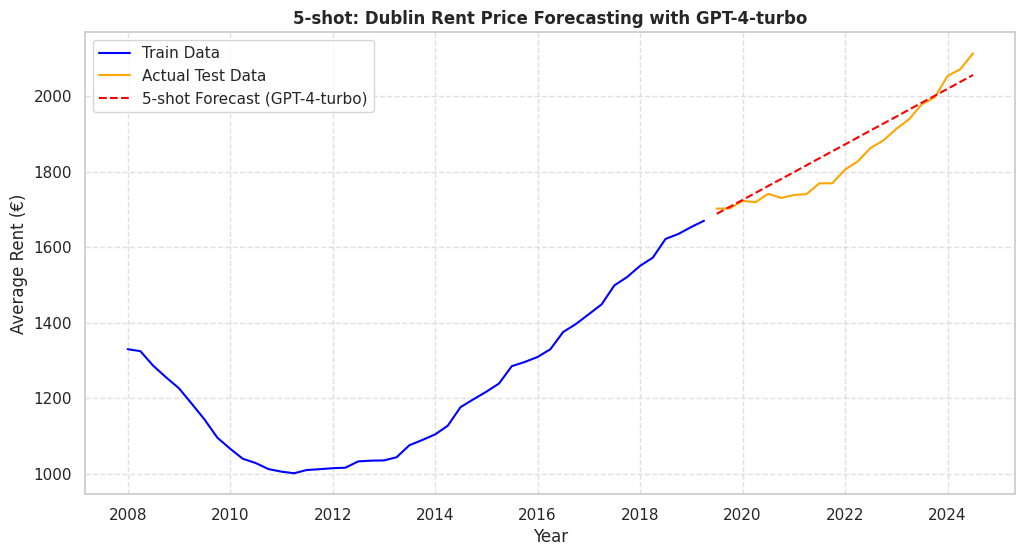

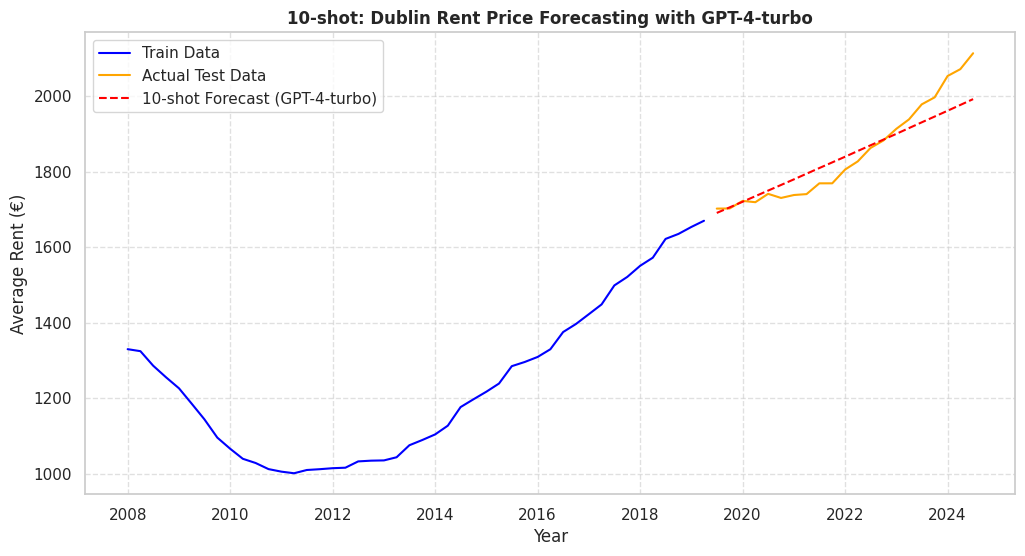

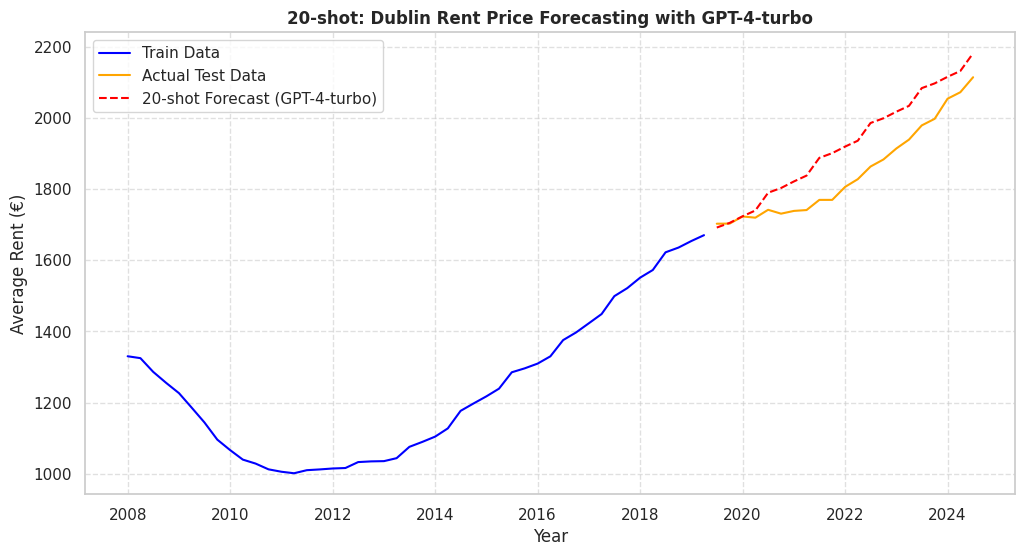

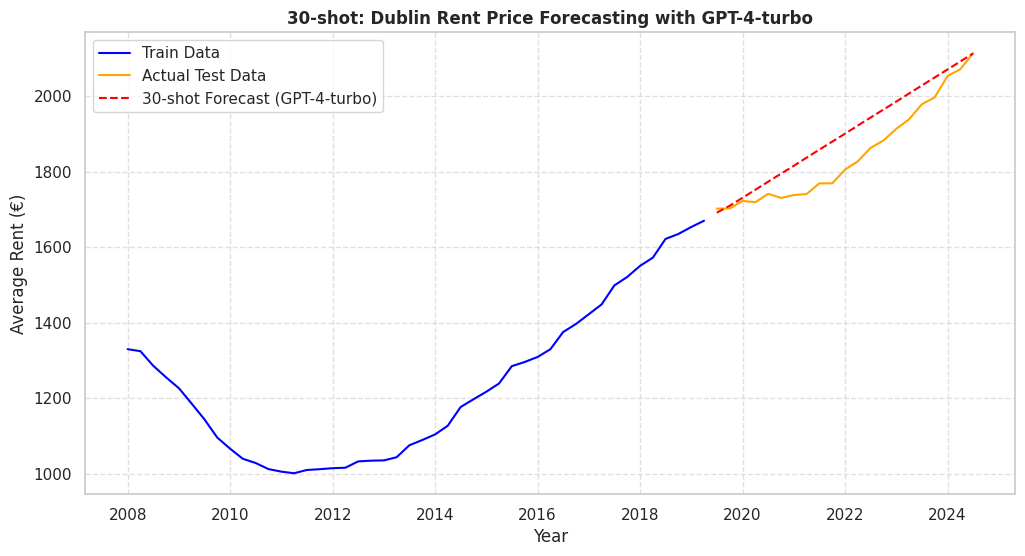

In [ ]:
# Plot GPT-based (gpt-4-turbo) rent forecasts for each few-shot level
for shot, forecast_gpt4_df in all_forecasts_gpt4.items():
    plt.figure(figsize=(12, 6))

    # Plot the training data (blue line)
    plt.plot(train_df['Quarter'], train_df['Average Rent (€)'], label='Train Data', color='blue')

    # Plot the actual test data (orange line)
    plt.plot(test_df.index, test_df['Average Rent (€)'], label='Actual Test Data', color='orange')

    # Plot the predicted forecast from GPT (red dashed line)
    plt.plot(forecast_gpt4_df['Quarter'], forecast_gpt4_df['Predicted Rent (€)'], label=f"{shot} Forecast (GPT-4-turbo)", color="red", linestyle="dashed")

    plt.legend(loc='upper left')
    plt.xlabel("Year")
    plt.ylabel('Average Rent (€)')
    plt.title(f"{shot}: Dublin Rent Price Forecasting with GPT-4-turbo",
              fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Save plot
    filename = f"{shot.lower().replace('-', '_')}_forecast_gpt4turbo.png"
    plt.savefig(os.path.join(output_dir, filename), dpi=300)
    plt.show()

In [ ]:
# Merge the GPT (GPT-4-turbo) shot forecasts
merged_gpt_4_df = merge_forecast(all_forecasts_gpt4)

In [ ]:
merged_gpt_4_df.head()

,Quarter,0-shot,1-shot,5-shot,10-shot,20-shot,30-shot
0,2019-07-01,1900.0,1702.53,1688.91,1691.23,1691.91,1691.91
1,2019-10-01,1925.0,1734.58,1707.30,1705.98,1705.04,1710.15
2,2020-01-01,1950.0,1766.67,1725.69,1720.76,1723.52,1731.39
3,2020-04-01,1975.0,1798.80,1744.08,1735.57,1739.91,1752.63
4,2020-07-01,2000.0,1830.98,1762.47,1750.41,1789.75,1773.87


In [ ]:
# Run the evaluation function to compute MSE, MAE, and R²
gpt_4_turbo_metrics_df = evaluate_llm_forecast(merged_gpt_4_df, test_df, evaluation_shot_levels)
gpt_4_turbo_metrics_df.head(6)

,Shot Level,MSE,MAE,R²,MAPE
0,0-shot,93716.78,302.84,-4.5597,16.41
1,1-shot,38370.93,178.76,-1.2763,9.50
2,5-shot,2132.71,38.89,0.8735,2.12
3,10-shot,2417.09,37.19,0.8566,1.94
4,20-shot,7651.71,77.74,0.5461,4.18
5,30-shot,4239.23,55.37,0.7485,3.03


### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">TIME-LLM MODEL</div>

In [ ]:
train_df.describe()

,Quarter,Average Rent (€),Differenced Rent
count,46,46.000000,46.000000
mean,2013-08-16 03:39:07.826086912,1239.853043,7.778913
min,2008-01-01 00:00:00,1001.700000,-48.470000
25%,2010-10-24 00:00:00,1041.027500,-5.062500
50%,2013-08-16 00:00:00,1207.710000,13.580000
75%,2016-06-08 06:00:00,1364.430000,21.575000
max,2019-04-01 00:00:00,1670.520000,50.310000
std,NaN,207.509321,25.402025


In [ ]:
train_df.median()

,0
Quarter,2013-08-16 00:00:00
Average Rent (€),1207.71
Differenced Rent,13.58


In [ ]:
import gc
def forecast_time_llm(df, input_size=8, batch_size=8, max_steps=None):
    """
    Train and forecast Dublin rent prices using Time-LLM (GPT-2).

    Args:
        df (pd.DataFrame): Original dataset.
        input_size (int): Number of past observations used for forecasting.
        batch_size (int): Batch size during training.

    Returns:
        forecast_df (pd.DataFrame): Forecasted values for the test set.
    """

    # Reset and rename columns
    df = df.reset_index()
    df = df.rename(columns={'Quarter': 'ds', 'Average Rent (€)': 'y'})
    df['ds'] = pd.to_datetime(df['ds']) + QuarterBegin(startingMonth=1)
    df['unique_id'] = 'dublin'
    df['quarter'] = df['ds'].dt.quarter

    # Split into train and test
    train_size = int(len(df) * 0.70)
    train_df = df.iloc[:train_size]
    test_df = df.iloc[train_size:]
    forecast_horizon = len(test_df)

    # Prompt for TimeLLM
    prompt_prefix = (
    # "This dataset contains quarterly average rent prices in Dublin. "
    # "Prices follow an upward trend with quarterly seasonal variation. "
    # "Use the historical context to forecast future rent prices."

    "This dataset contains quarterly average rent prices in Dublin"
    "Prices follow an upward trend with clear seasonal variation. "
    "Use the historical values to forecast the next quarterly average rent prices."
    "The input has a minimum value of 1001.70, a maximum of 1670.52, and a median of 1207.71. "
    "The top autocorrelated lags are [0, 2, 4, 6, 8]. "
    )



    # Define TimeLLM model (max_steps optional)
    model_args = {
        'h': forecast_horizon,
        'input_size': input_size,
        'llm': 'openai-community/gpt2',
        'prompt_prefix': prompt_prefix,
        'start_padding_enabled': True,
        'batch_size': batch_size,
        'valid_batch_size': batch_size,
        'windows_batch_size': batch_size
    }
    if max_steps is not None:
        model_args['max_steps'] = max_steps

    timellm = TimeLLM(**model_args)

    nf = NeuralForecast(models=[timellm], freq='Q')
    nf.fit(df=train_df, val_size=forecast_horizon)

    # Make predictions
    futr_df = nf.make_future_dataframe(df=train_df)
    forecast_df = nf.predict(futr_df=futr_df)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(train_df['ds'], train_df['y'], label='Train', color='royalblue')
    plt.plot(test_df['ds'], test_df['y'], label='Actual', color='orange')
    plt.plot(futr_df['ds'].iloc[-len(test_df):], forecast_df['TimeLLM'].values,
             label=f'Time-LLM Forecast (input_size={input_size})', color="red", linestyle='--')

    plt.title(
    f"Dublin Rent Forecast using Time-LLM (GPT-2)\n"
    f"Train: 70% | Test: 30% | input_size={input_size}, batch_size={batch_size}, max_steps={max_steps}",
    fontsize=12, fontweight='bold')

    plt.xlabel("Quarter", fontsize=11)
    plt.ylabel("Average Rent (€)", fontsize=11)
    plt.legend(frameon=False)
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Save the figure
    plt.savefig(
    f"time_llm_forecast_input{input_size}_batch{batch_size}_steps{max_steps}.png",
    dpi=300,
    bbox_inches='tight'
    )
    plt.show()

    #  Evaluate
    y_true = test_df['y'].iloc[:len(forecast_df)].values
    y_pred = forecast_df['TimeLLM'].values

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print("\nEvaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


    # Free heavy memory
    del nf
    del timellm
    torch.cuda.empty_cache()
    gc.collect()

    return forecast_df, {'MSE': mse, 'MAE': mae, 'R2': r2}


INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmbedding     | 1.5 K  | train
5 | mapping_layer       | Linear             | 51.5 M | train
6 | reprogramming_layer | Reprog

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU availa

Predicting: |          | 0/? [00:00<?, ?it/s]

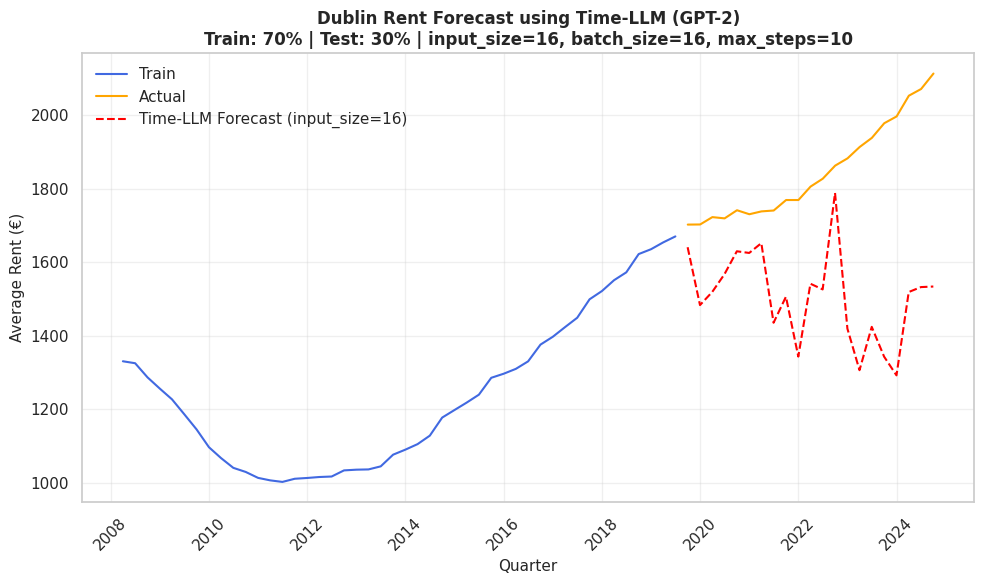


Evaluation Metrics:
Mean Squared Error (MSE): 158333.49
Mean Absolute Error (MAE): 340.96
R² Score: -8.3930
Mean Absolute Percentage Error (MAPE): 17.92%


In [ ]:
time_llm_forecast_df = forecast_time_llm(
    dublin_df,
    input_size=16,
    batch_size=16,
    max_steps=10
)

In [ ]:
import gc

# Reset index to make 'Quarter' a column
test_df = test_df.reset_index()

# Rename columns to match expected format
test_df = test_df.rename(columns={'Quarter': 'ds', 'Average Rent (€)': 'y'})

# Ensure 'ds' is datetime and shifted to quarter start if needed
test_df['ds'] = pd.to_datetime(test_df['ds']) + QuarterBegin(startingMonth=1)

# Add unique_id for univariate time series
test_df['unique_id'] = 'dublin'

# Define forecast horizon
forecast_horizon = len(test_df)

# Define prompt prefix
prompt_prefix = (
    "This dataset contains quarterly average rent prices in Dublin. "
    "Prices follow an upward trend with clear seasonal variation. "
    "Use the historical values to forecast the next quarterly average rent prices. "
    "The input has a minimum value of 1001.70, a maximum of 1670.52, and a median of 1207.71. "
    "The top autocorrelated lags are [0, 2, 4, 6, 8]."
)


# Hyperparameter grid
input_sizes = [4, 6, 8]
batch_sizes = [8, 16, 32]

# Initialize best score tracking
best_mse = np.inf
best_params = None
results = []

for input_size in input_sizes:
    for batch_size in batch_sizes:
        print(f"Training with input_size={input_size}, batch_size={batch_size}")

        try:
            # Define the TimeLLM model
            timellm = TimeLLM(
                h=forecast_horizon,
                input_size=input_size,
                llm='openai-community/gpt2',
                prompt_prefix=prompt_prefix,
                start_padding_enabled=True,
                batch_size=batch_size,
                valid_batch_size=batch_size,
                windows_batch_size=batch_size,
                top_k=2  # Safe value to avoid autocorrelation errors
            )

            nf = NeuralForecast(models=[timellm], freq='Q')

            # Fit the model
            nf.fit(df=train_df, val_size=forecast_horizon)

            # Forecast
            futr_df = nf.make_future_dataframe(df=train_df)
            forecasts = nf.predict(futr_df=futr_df)

            # Evaluate performance
            preds = forecasts['TimeLLM'].values
            y_true = test_df['y'].values
            mse = mean_squared_error(y_true, preds)

            print(f"MSE: {mse:.4f}")
            results.append((input_size, batch_size, mse))

            # Update best score
            if mse < best_mse:
                best_mse = mse
                best_params = (input_size, batch_size)

        except Exception as e:
            print(f"Skipped input_size={input_size}, batch_size={batch_size} due to error: {e}")

        finally:
            # Free memory
            del nf, timellm
            gc.collect()
            torch.cuda.empty_cache()

# Final output
print(f"\nBest params: input_size={best_params[0]}, batch_size={best_params[1]} with MSE={best_mse:.4f}")

INFO:lightning_fabric.utilities.seed:Seed set to 1


Training with input_size=4, batch_size=8
Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/torch/nn/init.py:511: UserWarning:

Initializing zero-element tensors is a no-op

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmb

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Skipped input_size=4, batch_size=8 due to error: maximum size for tensor at dimension 2 is 12 but size is 16


INFO:lightning_fabric.utilities.seed:Seed set to 1


Training with input_size=4, batch_size=16
Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/torch/nn/init.py:511: UserWarning:

Initializing zero-element tensors is a no-op

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmb

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Skipped input_size=4, batch_size=16 due to error: maximum size for tensor at dimension 2 is 12 but size is 16


INFO:lightning_fabric.utilities.seed:Seed set to 1


Training with input_size=4, batch_size=32
Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/torch/nn/init.py:511: UserWarning:

Initializing zero-element tensors is a no-op

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmb

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Skipped input_size=4, batch_size=32 due to error: maximum size for tensor at dimension 2 is 12 but size is 16


INFO:lightning_fabric.utilities.seed:Seed set to 1


Training with input_size=6, batch_size=8
Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/torch/nn/init.py:511: UserWarning:

Initializing zero-element tensors is a no-op

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmb

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Skipped input_size=6, batch_size=8 due to error: maximum size for tensor at dimension 2 is 14 but size is 16


INFO:lightning_fabric.utilities.seed:Seed set to 1


Training with input_size=6, batch_size=16
Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/torch/nn/init.py:511: UserWarning:

Initializing zero-element tensors is a no-op

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmb

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Skipped input_size=6, batch_size=16 due to error: maximum size for tensor at dimension 2 is 14 but size is 16


INFO:lightning_fabric.utilities.seed:Seed set to 1


Training with input_size=6, batch_size=32
Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/torch/nn/init.py:511: UserWarning:

Initializing zero-element tensors is a no-op

/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmb

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Skipped input_size=6, batch_size=32 due to error: maximum size for tensor at dimension 2 is 14 but size is 16


INFO:lightning_fabric.utilities.seed:Seed set to 1


Training with input_size=8, batch_size=8
Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmbedding     | 1.5 K  | train
5 | mapping_layer       | Linear             | 51.5 M | train
6 | reprogramming_layer | Reprog

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=5` reached.
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU availab

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.seed:Seed set to 1


MSE: 83385.1810
Training with input_size=8, batch_size=16
Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmbedding     | 1.5 K  | train
5 | mapping_layer       | Linear             | 51.5 M | train
6 | reprogramming_layer | Reprog

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=5` reached.
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU availab

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:lightning_fabric.utilities.seed:Seed set to 1


MSE: 33295.0959
Training with input_size=8, batch_size=32
Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmbedding     | 1.5 K  | train
5 | mapping_layer       | Linear             | 51.5 M | train
6 | reprogramming_layer | Reprog

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=5` reached.
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU availab

Predicting: |          | 0/? [00:00<?, ?it/s]

MSE: 33499.4688

Best params: input_size=8, batch_size=16 with MSE=33295.0959


INFO:lightning_fabric.utilities.seed:Seed set to 1


Successfully loaded model: openai-community/gpt2


/usr/local/lib/python3.11/dist-packages/neuralforecast/common/_base_model.py:537: UserWarning:

val_check_steps is greater than max_steps, setting val_check_steps to max_steps.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type               | Params | Mode 
-------------------------------------------------------------------
0 | loss                | MAE                | 0      | train
1 | padder_train        | ConstantPad1d      | 0      | train
2 | scaler              | TemporalNorm       | 0      | train
3 | llm                 | GPT2Model          | 124 M  | eval 
4 | patch_embedding     | PatchEmbedding     | 1.5 K  | train
5 | mapping_layer       | Linear             | 51.5 M | train
6 | reprogramming_layer | Reprog

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU availa

Predicting: |          | 0/? [00:00<?, ?it/s]

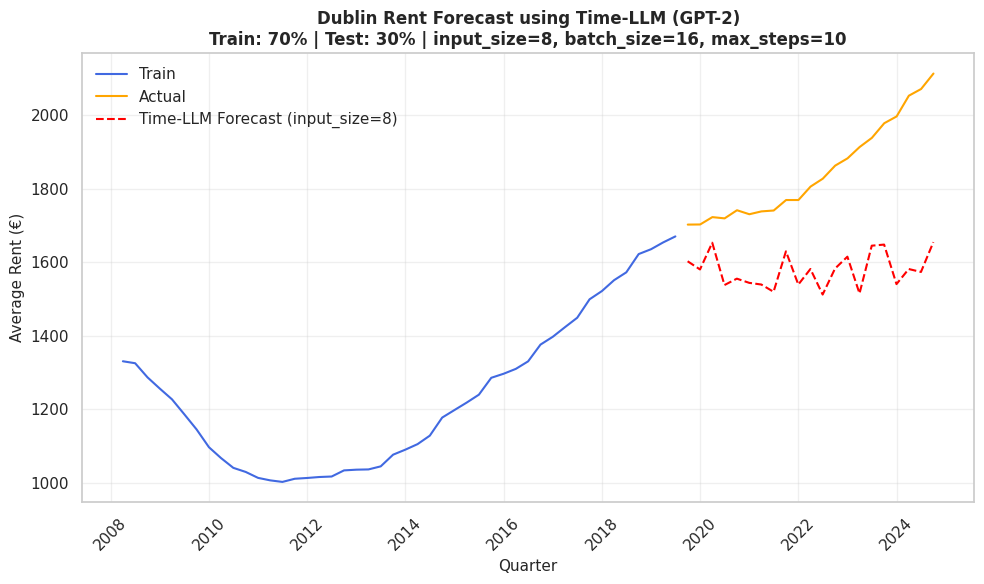


Evaluation Metrics:
Mean Squared Error (MSE): 87621.73
Mean Absolute Error (MAE): 268.40
R² Score: -4.1981
Mean Absolute Percentage Error (MAPE): 14.17%


In [ ]:
time_llm_forecast_df = forecast_time_llm(
    dublin_df,
    input_size=8,
    batch_size=16,
    max_steps=10
)

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">AMAZON CHRONOS MODEL</div>

In [ ]:
import random
import transformers
def evaluate_chronos_model(df, model_name="amazon/chronos-t5-large", train_ratio=0.7, num_samples=36, plot=True):
    torch.manual_seed(42)
    transformers.set_seed(42, deterministic=True)
    #  Reset the index and rename columns for consistency with Chronos format
    df = df.reset_index()
    df = df.rename(columns={'Quarter': 'ds', 'Average Rent (€)': 'y'}).copy()
    df['unique_id'] = 'dublin'  # Identifier for Chronos format

    # Convert the target series to a PyTorch tensor (tensor input for Chronos model)
    series = torch.tensor(df['y'].values, dtype=torch.float)

    # Split the data into train and test sets
    train_size = int(train_ratio * len(series))
    context = series[:train_size]
    prediction_length = len(series) - train_size

    # Load the Chronos pre-trained forecasting pipeline
    pipeline = ChronosPipeline.from_pretrained(
        model_name,
        device_map="cpu",
        torch_dtype=torch.float32
    )

    # Generate forecasts from the model
    forecast = pipeline.predict(
        context=context,
        prediction_length=prediction_length,
        num_samples=num_samples
    )

    # Post-process forecast results
    # - Convert to NumPy array
    # - Compute quantiles: 10% (low), 50% (median), 90% (high)
    forecast_np = forecast[0].numpy()
    low, median, high = np.quantile(forecast_np, [0.1, 0.5, 0.9], axis=0)

    # Evaluation
    y_true = df['y'].iloc[train_size:].values
    y_pred = median[:len(y_true)]

    # Compute metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Plot actual vs forecast with confidence interval (Chronos model)
    if plot:
        forecast_dates = df['ds'].iloc[train_size:].reset_index(drop=True)
        plt.figure(figsize=(10, 6))
        plt.plot(df['ds'].iloc[:train_size], df['y'].iloc[:train_size], label='Train', color='royalblue')
        plt.plot(df['ds'].iloc[train_size:], df['y'].iloc[train_size:], label='Actual', color='orange')
        plt.plot(forecast_dates, median, label='Forecast (Median)', color='green')
        plt.fill_between(forecast_dates, low, high, color='green', alpha=0.3, label='70% Prediction Interval')
        plt.title(f"Dublin Rent Forecast with {model_name.split('/')[-1]} (Train Ratio = {train_ratio})", fontsize=12, fontweight='bold')
        plt.xlabel("Quarter")
        plt.ylabel("Average Rent (€)")
        plt.grid(True)
        plt.legend()
        plt.savefig(
        f"chronos_forecast_{model_name.split('/')[-1]}_train{int(train_ratio*100)}_samples{num_samples}.png",
        dpi=300,
        bbox_inches='tight'
        )
        plt.show()

    # Return evaluation results as a dictionary
    return {
        "model": model_name.split('/')[-1],
        "Train Ratio": train_ratio,
        "MSE": round(mse, 2),
        "MAE": round(mae, 2),
        "R2": round(r2, 2),
        "MAPE": round(mape, 2)
    }

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">chronos-t5-large, train_ratio=0.7</div>

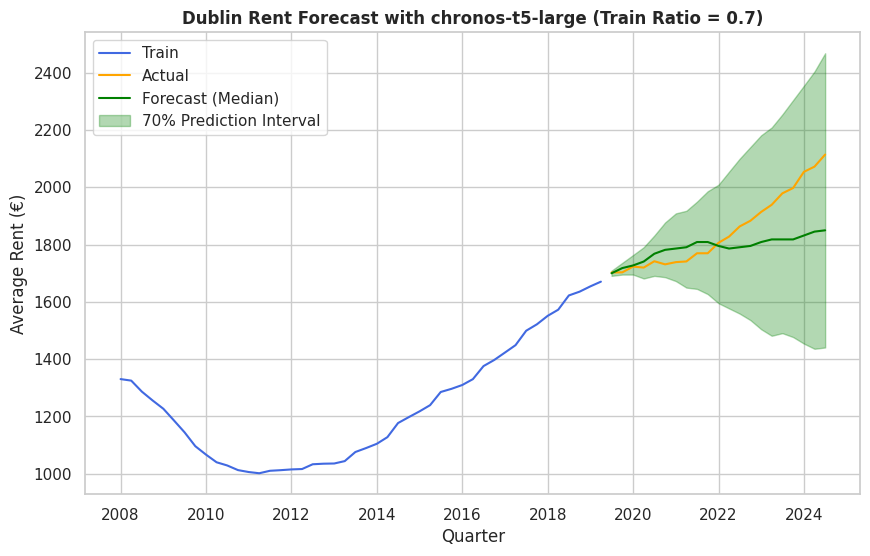

{'model': 'chronos-t5-large', 'Train Ratio': 0.7, 'MSE': 13389.36, 'MAE': 85.17, 'R2': 0.21, 'MAPE': 4.36}


In [ ]:
# Evaluate the Chronos T5 Large model on the Dublin Rent dataset (train_ratio=0.7)
results_large_chronos_70 = evaluate_chronos_model(dublin_df, model_name="amazon/chronos-t5-large", train_ratio=0.7)

# Display the evaluation results: MSE, MAE, and R²
print(results_large_chronos_70)

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">chronos-t5-small, train_ratio=0.7</div>

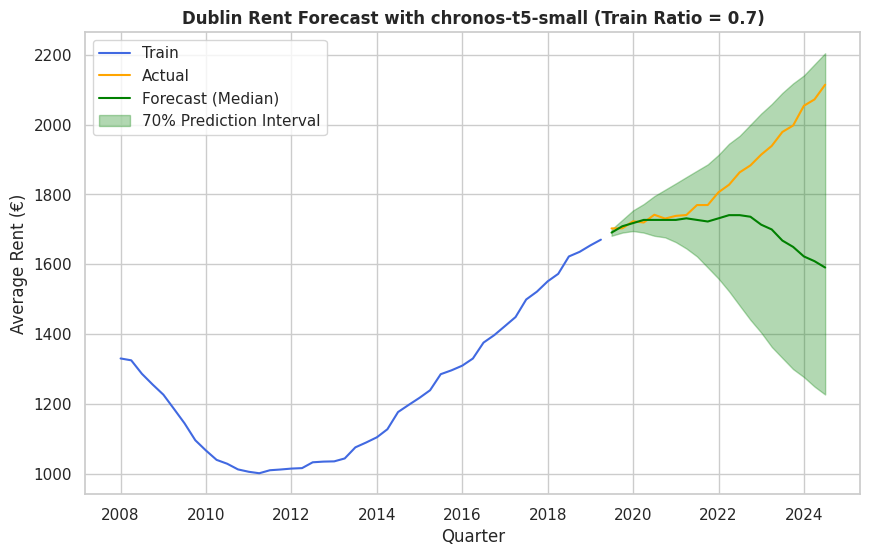

{'model': 'chronos-t5-small', 'Train Ratio': 0.7, 'MSE': 49719.94, 'MAE': 147.97, 'R2': -1.95, 'MAPE': 7.45}


In [ ]:
# Evaluate the Chronos T5 Small model on the Dublin Rent dataset (train_ratio=0.7)
results_small_chronos_70 = evaluate_chronos_model(dublin_df, model_name="amazon/chronos-t5-small", train_ratio=0.7)

# Display the evaluation results: MSE, MAE, and R²
print(results_small_chronos_70)

### <div style="background-color:#DFF0D8; padding:10px; border-radius:5px;">chronos-t5-base, train_ratio=0.7</div>

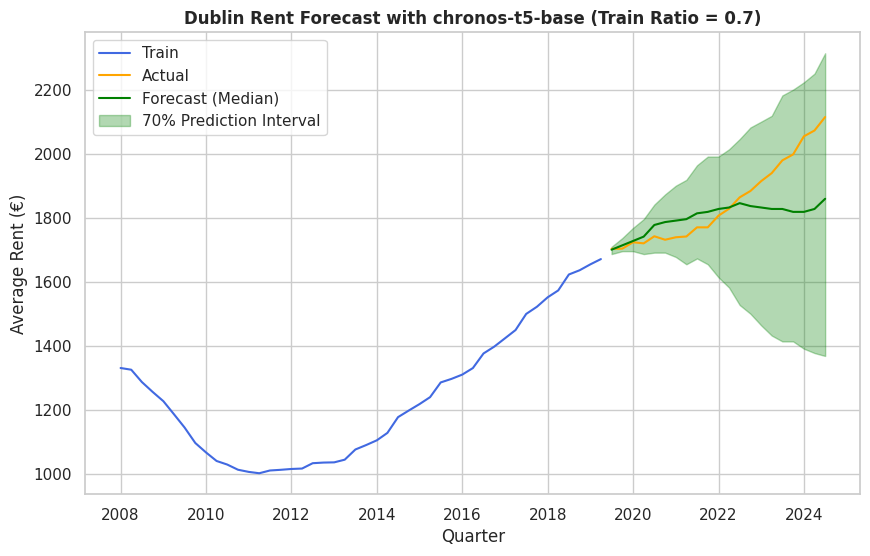

{'model': 'chronos-t5-base', 'Train Ratio': 0.7, 'MSE': 13009.31, 'MAE': 79.94, 'R2': 0.23, 'MAPE': 4.08}


In [ ]:
# Evaluate the Chronos T5 Base model on the Dublin Rent dataset (train_ratio=0.7)
results_base_chronos_70 = evaluate_chronos_model(dublin_df, model_name="amazon/chronos-t5-base", train_ratio=0.7)

# Display the evaluation results: MSE, MAE, and R²
print(results_base_chronos_70)

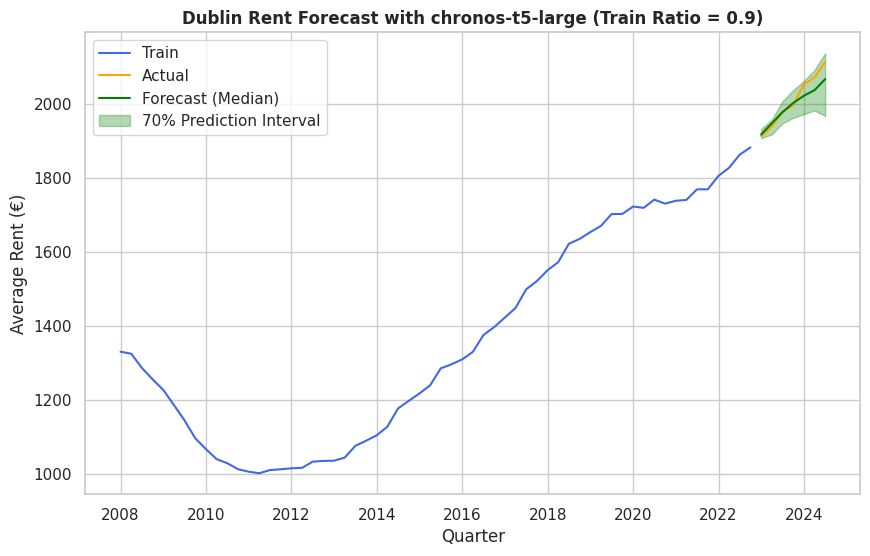

{'model': 'chronos-t5-large', 'Train Ratio': 0.9, 'MSE': 629.98, 'MAE': 18.71, 'R2': 0.86, 'MAPE': 0.91}


In [ ]:
# Evaluate the Chronos T5 Large model on the Dublin Rent dataset (train_ratio=0.9)
results_large_chronos_90 = evaluate_chronos_model(dublin_df, model_name="amazon/chronos-t5-large", train_ratio=0.9)

# Display the evaluation results: MSE, MAE, and R²
print(results_large_chronos_90)

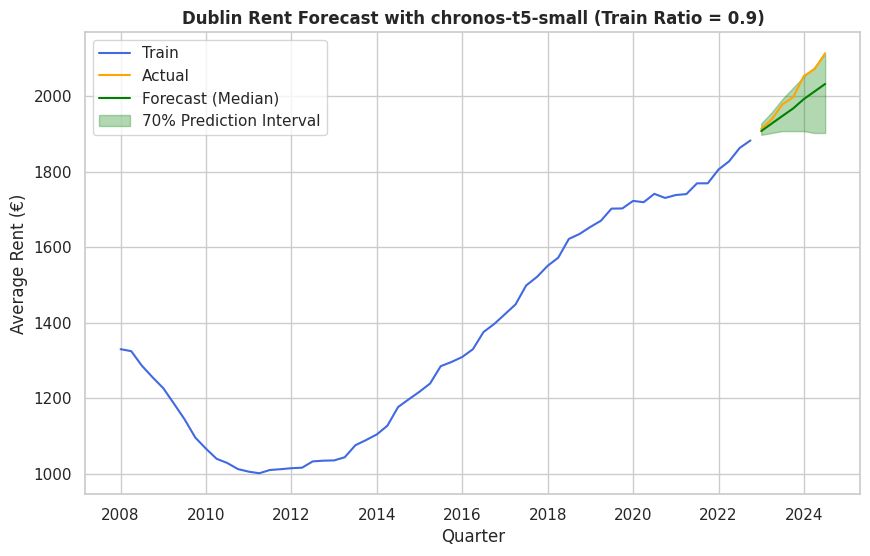

{'model': 'chronos-t5-small', 'Train Ratio': 0.9, 'MSE': 2259.73, 'MAE': 39.85, 'R2': 0.51, 'MAPE': 1.94}


In [ ]:
# Evaluate the Chronos T5 Small model on the Dublin Rent dataset (train_ratio=0.9)
results_small_chronos_90 = evaluate_chronos_model(dublin_df, model_name="amazon/chronos-t5-small", train_ratio=0.9)

# Display the evaluation results: MSE, MAE, and R²
print(results_small_chronos_90)

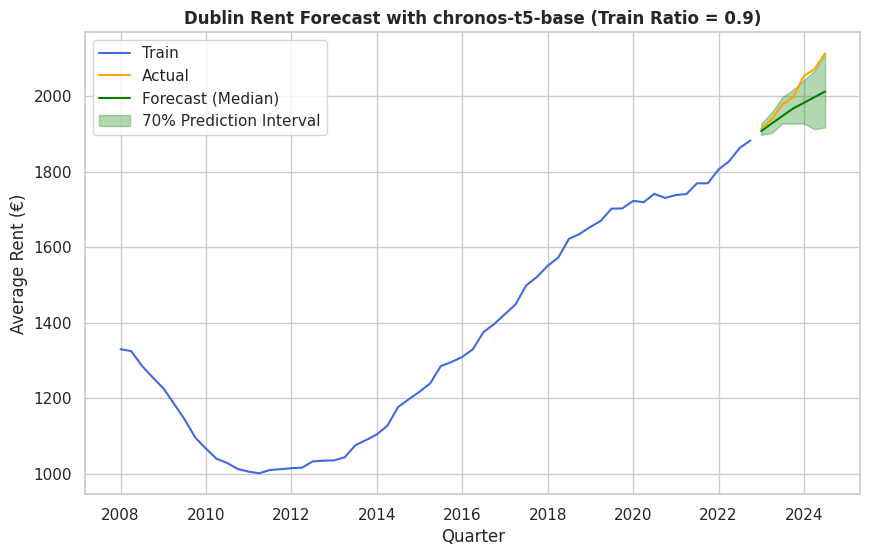

{'model': 'chronos-t5-base', 'Train Ratio': 0.9, 'MSE': 3254.84, 'MAE': 46.27, 'R2': 0.29, 'MAPE': 2.25}


In [ ]:
# Evaluate the Chronos T5 Base model on the Dublin Rent dataset (train_ratio=0.9)
results_base_chronos_90 = evaluate_chronos_model(dublin_df, model_name="amazon/chronos-t5-base", train_ratio=0.9)

# Display the evaluation results: MSE, MAE, and R²
print(results_base_chronos_90)